Mounted at /content/drive
Training and evaluating model: Naive Bayes
Training and evaluating model: KNN
Training and evaluating model: SVM
Training and evaluating model: Random Forest
Training and evaluating model: Decision Tree
Training and evaluating model: XGBoost
Training and evaluating model: Logistic Regression
Training and evaluating model: ANN


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                    Accuracy (Train) Accuracy (Test) Precision (Test)  \
Naive Bayes                89.864865       89.189189             84.0   
KNN                        93.918919       91.891892            100.0   
SVM                        92.567568       91.891892            100.0   
Random Forest                  100.0       86.486486        86.363636   
Decision Tree                  100.0       86.486486        86.363636   
XGBoost                        100.0       86.486486        86.363636   
Logistic Regression         95.27027       91.891892            100.0   
ANN                         54.72973       43.243243              0.0   

                    Recall (Test) Specificity (Test) F1 Score (Test)  \
Naive Bayes                 100.0               75.0       91.304348   
KNN                     85.714286              100.0       92.307692   
SVM                     85.714286              100.0       92.307692   
Random Forest            90.47619              81.25  

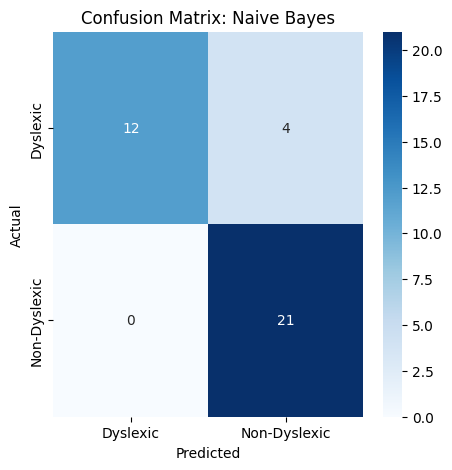

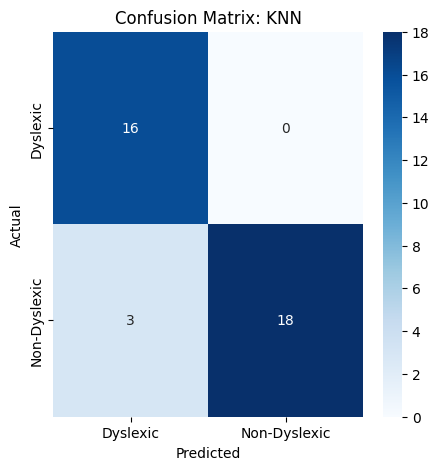

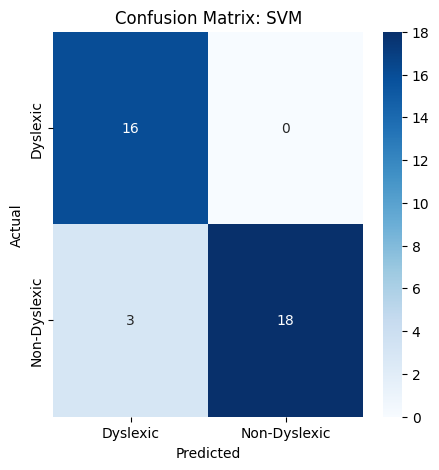

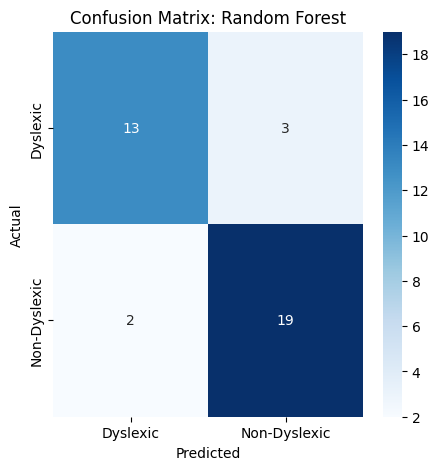

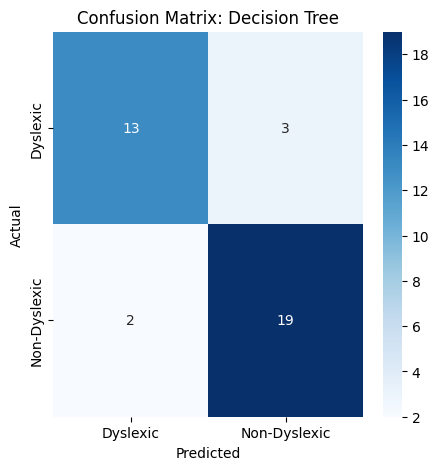

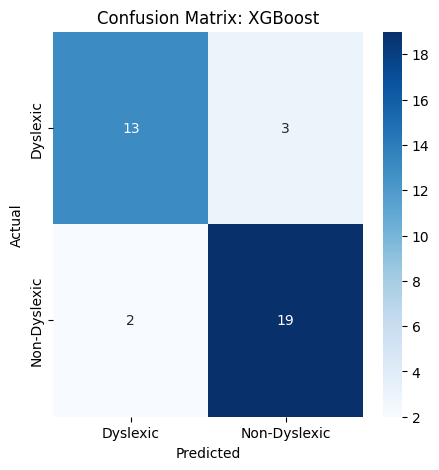

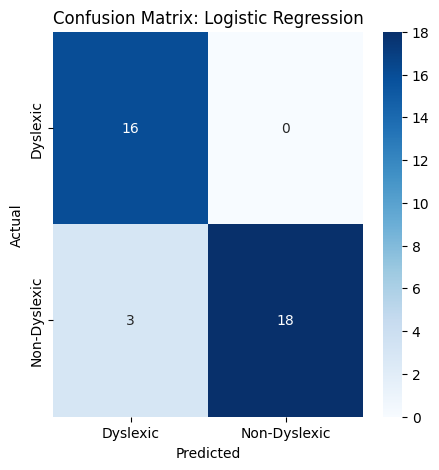

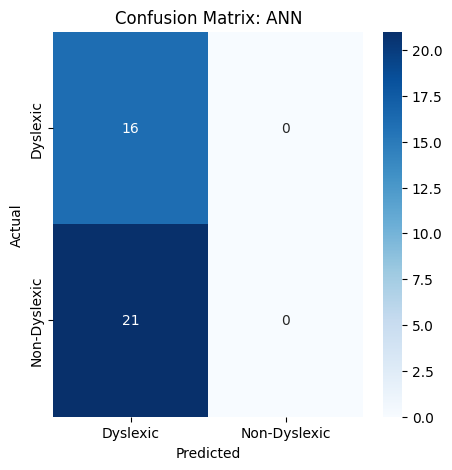

In [ ]:

# Step 1: Loading the Dataset from Google Drive

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset (assuming it's in your drive)
file_path = '/content/drive/My Drive/AI-ML/eye_tracking.xlsx'  # Update with your file path
df = pd.read_excel(file_path)
y = df.iloc[:, 0]  # Label column (0 for dyslexic, 1 for non-dyslexic)
X = df.iloc[:, 2:]

# Display the first few rows to understand the structure
df.head()

# Step 2: Feature Selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming the label is in the first column (index 0)
 # Features are all columns except the first one

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to sort features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 35 features based on importance
top_35_features = feature_importance_df.head(35)['Feature'].values
X_train_selected = X_train[top_35_features]
X_test_selected = X_test[top_35_features]

# Step 3: Create the 8 Classification Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary of models
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability =True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'ANN': MLPClassifier(random_state=42)
}

# Step 4: Model Evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, cohen_kappa_score

# Function to calculate evaluation metrics and return as percentage
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the metrics
    metrics = {}

    metrics['Accuracy (Train)'] = accuracy_score(y_train, y_train_pred) * 100
    metrics['Accuracy (Test)'] = accuracy_score(y_test, y_test_pred) * 100

    metrics['Precision (Test)'] = precision_score(y_test, y_test_pred) * 100
    metrics['Recall (Test)'] = recall_score(y_test, y_test_pred) * 100

    # Specificity = TN / (TN + FP) (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    metrics['Specificity (Test)'] = (tn / (tn + fp)) * 100

    metrics['F1 Score (Test)'] = f1_score(y_test, y_test_pred) * 100
    metrics['AUC'] = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100
    metrics['Kappa'] = cohen_kappa_score(y_test, y_test_pred) * 100

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    metrics['Confusion Matrix'] = cm

    return metrics

# Step 5: Run all models and store results

results = {}

for model_name, model in models.items():
    print(f"Training and evaluating model: {model_name}")
    metrics = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test)
    results[model_name] = metrics

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame(results).transpose()

# Display the results
import seaborn as sns
import matplotlib.pyplot as plt

# Tabulate all the metrics for comparison
print(results_df)

# Step 6: Plot Confusion Matrices (Optional)
for model_name, model in models.items():
    metrics = results[model_name]
    cm = metrics['Confusion Matrix']

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic', 'Non-Dyslexic'], yticklabels=['Dyslexic', 'Non-Dyslexic'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

   Accuracy (Train)  Accuracy (Test)  Precision (Test)  Recall (Test)  \
0          95.27027        91.891892             100.0      85.714286   

   Specificity (Test)  F1 Score (Test)       AUC      Kappa  \
0               100.0        92.307692  96.72619  83.842795   

     Confusion Matrix  
0  [[16, 0], [3, 18]]  


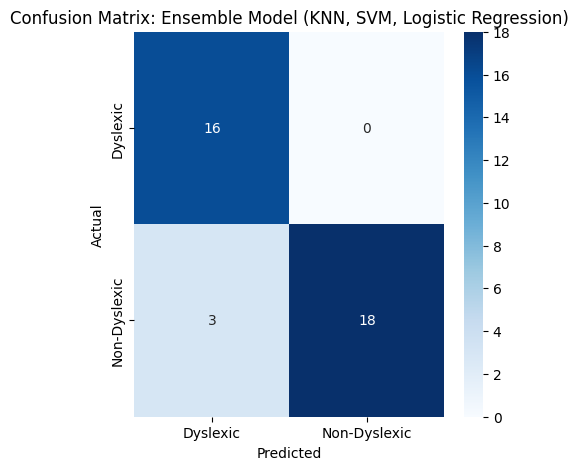

In [ ]:

# Step 2: Feature Selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming the label is in the first column (index 0)
y = df.iloc[:, 0]  # Label column (0 for dyslexic, 1 for non-dyslexic)
X = df.iloc[:, 2:]  # Features are all columns except the first one

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to sort features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 35 features based on importance
top_35_features = feature_importance_df.head(35)['Feature'].values
X_train_selected = X_train[top_35_features]
X_test_selected = X_test[top_35_features]

# Step 3: Create the Ensemble Model (KNN + SVM + Logistic Regression)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Initialize the models
knn = KNeighborsClassifier()
svm = SVC(probability=True, random_state=42)  # SVM with probability estimates
lr = LogisticRegression(random_state=42)

# Create the ensemble model with Soft Voting
ensemble_model = VotingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('lr', lr)],
    voting='soft'  # Soft voting means predicting based on predicted probabilities
)

# Step 4: Train the Ensemble Model
ensemble_model.fit(X_train_selected, y_train)

# Step 5: Evaluate the Ensemble Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, cohen_kappa_score

# Function to calculate evaluation metrics in percentage
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the metrics and convert to percentage
    metrics = {}

    metrics['Accuracy (Train)'] = accuracy_score(y_train, y_train_pred) * 100
    metrics['Accuracy (Test)'] = accuracy_score(y_test, y_test_pred) * 100

    metrics['Precision (Test)'] = precision_score(y_test, y_test_pred) * 100
    metrics['Recall (Test)'] = recall_score(y_test, y_test_pred) * 100

    # Specificity = TN / (TN + FP) (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    metrics['Specificity (Test)'] = (tn / (tn + fp)) * 100

    metrics['F1 Score (Test)'] = f1_score(y_test, y_test_pred) * 100
    metrics['AUC'] = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100
    metrics['Kappa'] = cohen_kappa_score(y_test, y_test_pred) * 100

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    metrics['Confusion Matrix'] = cm

    return metrics

# Evaluate the ensemble model
metrics = evaluate_model(ensemble_model, X_train_selected, X_test_selected, y_train, y_test)

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame([metrics])

# Display the evaluation metrics for the ensemble model
import seaborn as sns
import matplotlib.pyplot as plt

# Display the results in tabular form
print(metrics_df)

# Step 6: Plot Confusion Matrix (Optional)
cm = metrics['Confusion Matrix']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic', 'Non-Dyslexic'], yticklabels=['Dyslexic', 'Non-Dyslexic'])
plt.title(f'Confusion Matrix: Ensemble Model (KNN, SVM, Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

DIFFERENT MODEL TRAILS

Training and evaluating model: Naive Bayes
Training and evaluating model: KNN
Training and evaluating model: SVM
Training and evaluating model: Random Forest
Training and evaluating model: Decision Tree
Training and evaluating model: XGBoost
Training and evaluating model: Logistic Regression
Training and evaluating model: ANN


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training and evaluating model: Ridge Classifier
Training and evaluating model: Gradient Boosting
Training and evaluating model: AdaBoost
Training and evaluating model: Extra Trees


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training and evaluating model: Bagging
Training and evaluating model: LDA
Training and evaluating model: QDA
Training and evaluating model: SGD Classifier
Training and evaluating model: Perceptron
Training and evaluating model: Passive Aggressive
Training and evaluating model: HistGradientBoosting


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training and evaluating model: Gaussian Process
Training and evaluating model: Dummy Classifier
Training and evaluating model: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 67, number of negative: 81
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.452703 -> initscore=-0.189757
[LightGBM] [Info] Start training from score -0.189757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training and evaluating model: CatBoost
Training and evaluating model: Stacking


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training and evaluating model: Voting
Training and evaluating model: LassoCV
Training and evaluating model: CalibratedClassifierCV


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training and evaluating model: NearestCentroid
Training and evaluating model: ElasticNet
Training and evaluating model: LogitBoost


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training and evaluating model: Neural Network
Training and evaluating model: OneVsRest
Training and evaluating model: OneVsOne
                       Accuracy (Train) Accuracy (Test) Precision (Test)  \
Naive Bayes                   89.864865       89.189189             84.0   
KNN                           93.918919       91.891892            100.0   
SVM                           92.567568       91.891892            100.0   
Random Forest                     100.0       86.486486        86.363636   
Decision Tree                     100.0       86.486486        86.363636   
XGBoost                           100.0       86.486486        86.363636   
Logistic Regression            95.27027       91.891892            100.0   
ANN                            54.72973       43.243243              0.0   
Ridge Classifier              97.297297       94.594595            100.0   
Gradient Boosting                 100.0       86.486486        86.363636   
AdaBoost                          100

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

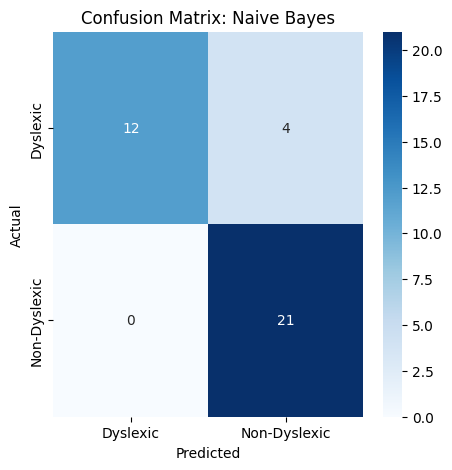

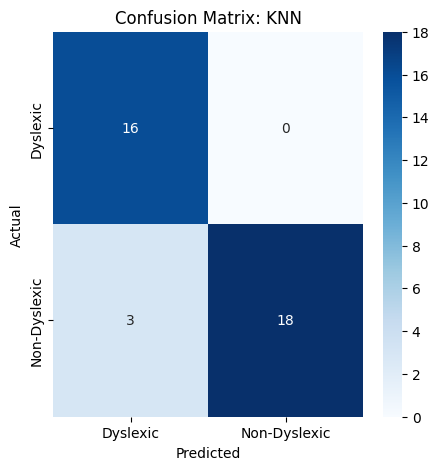

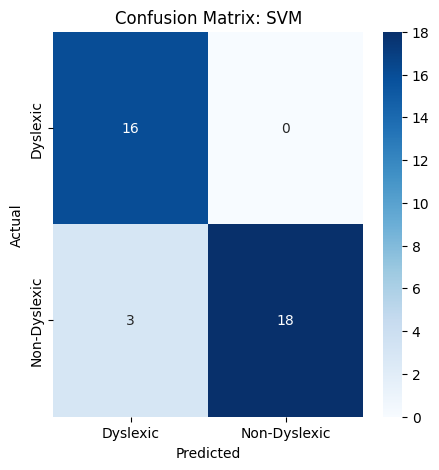

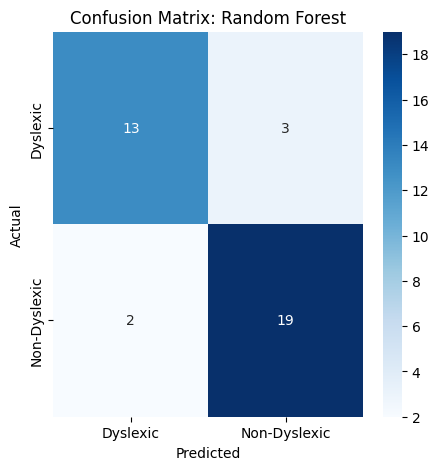

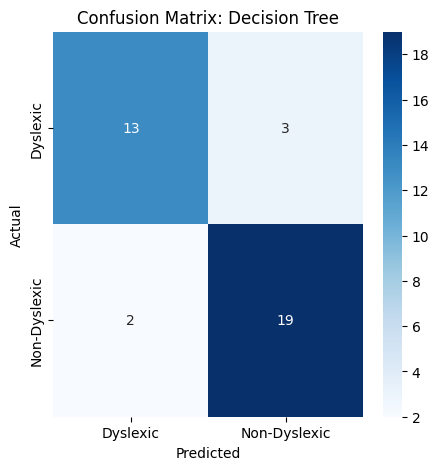

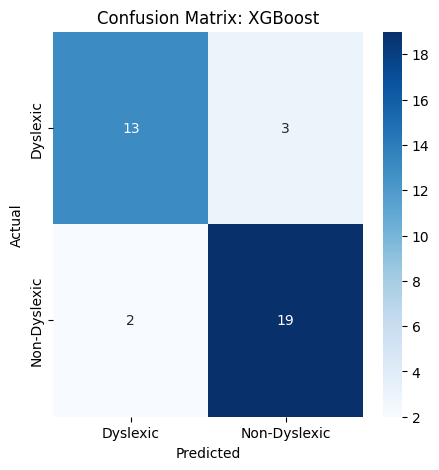

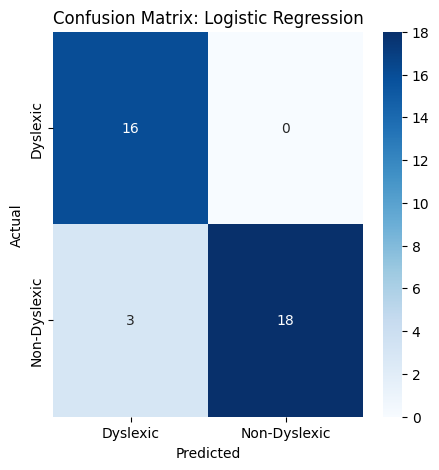

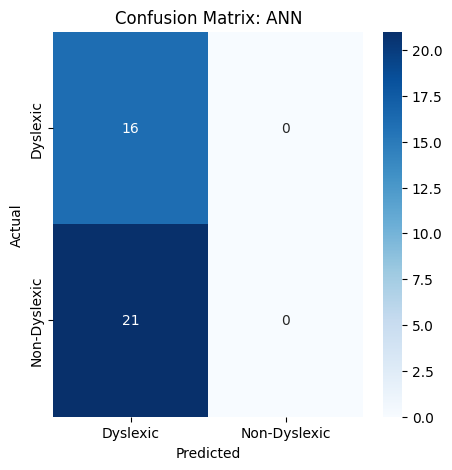

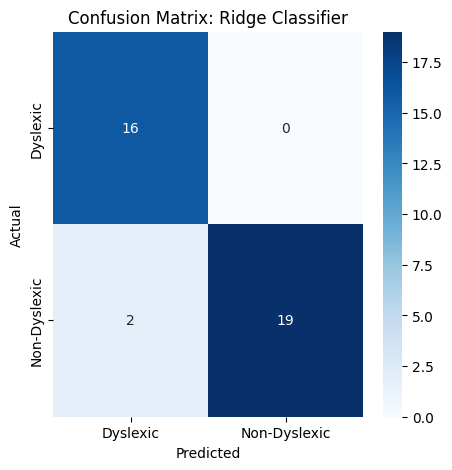

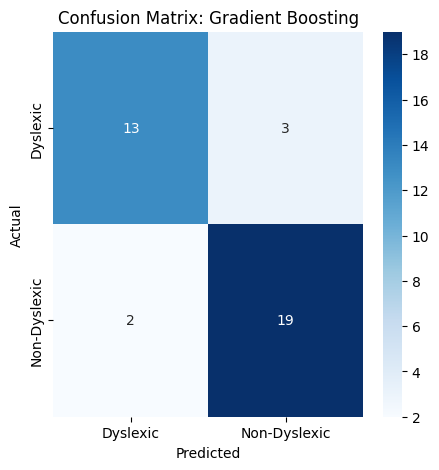

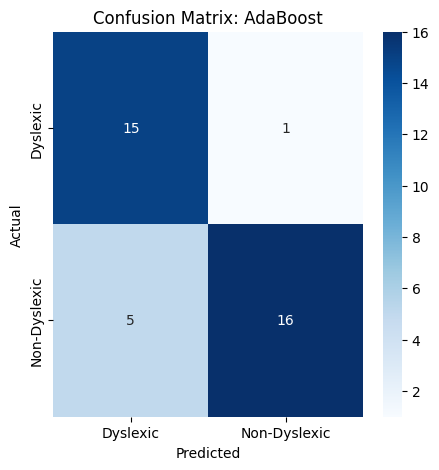

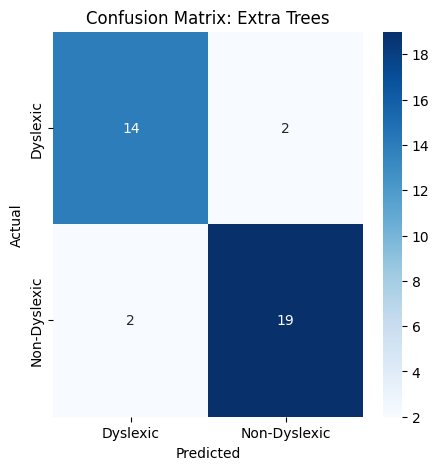

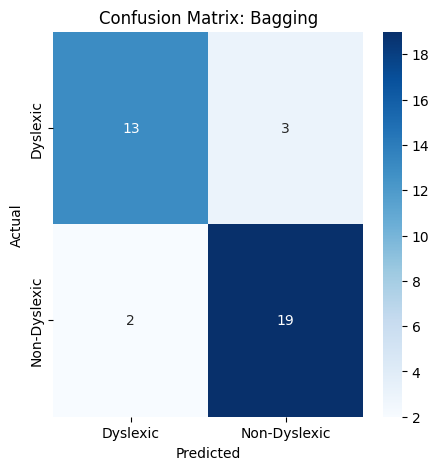

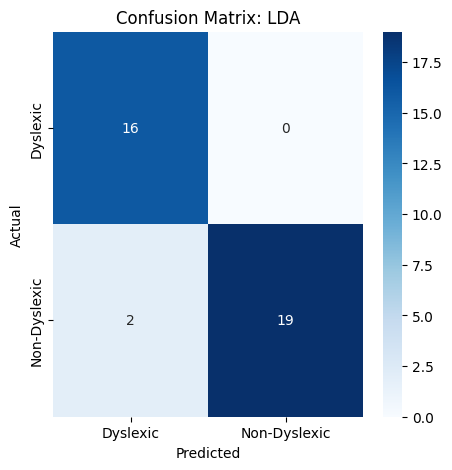

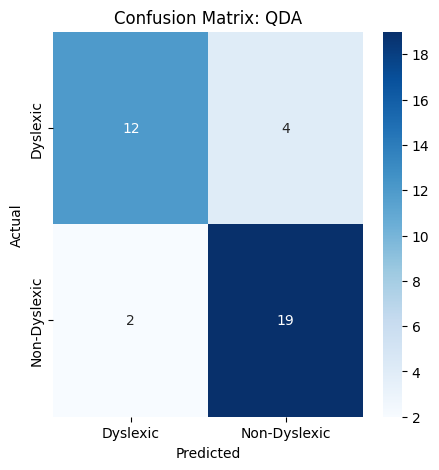

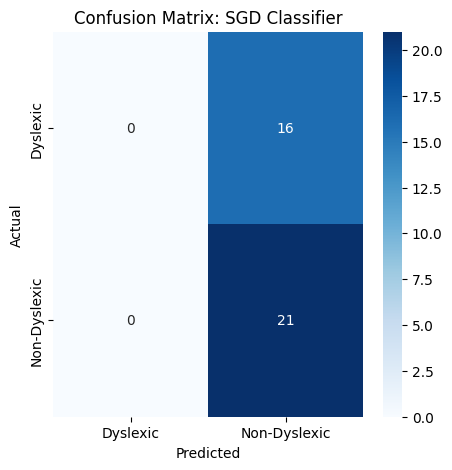

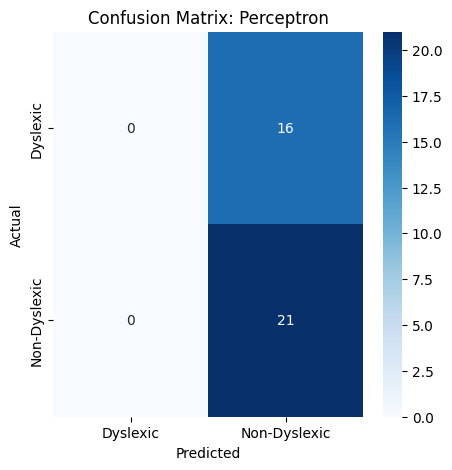

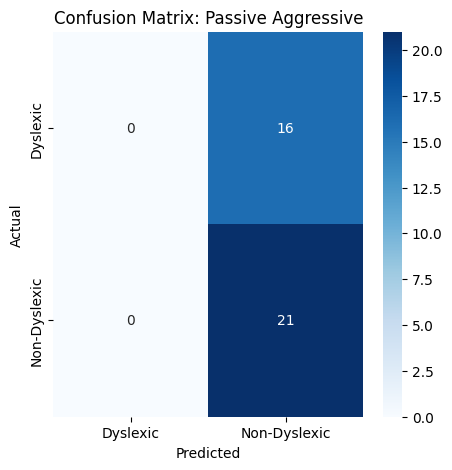

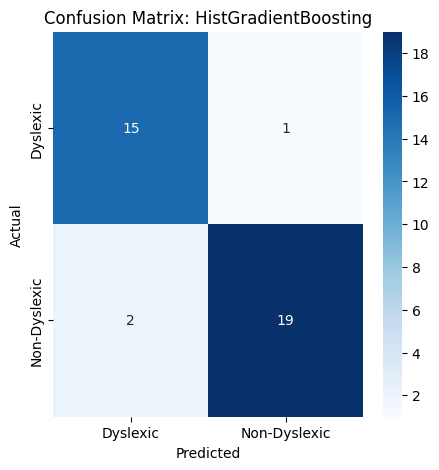

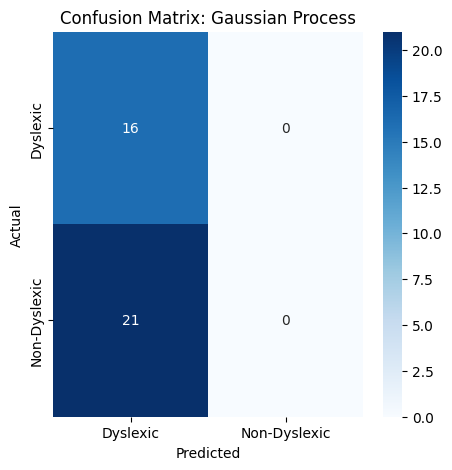

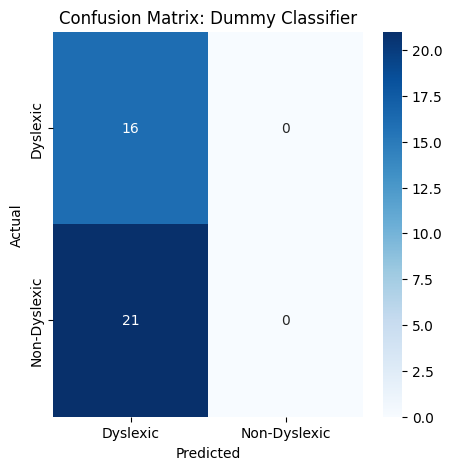

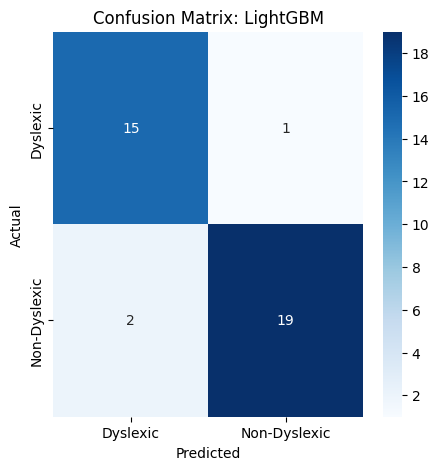

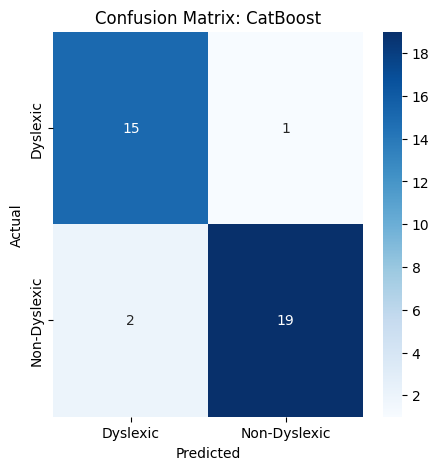

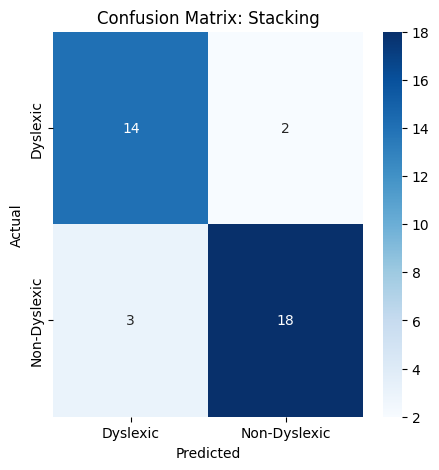

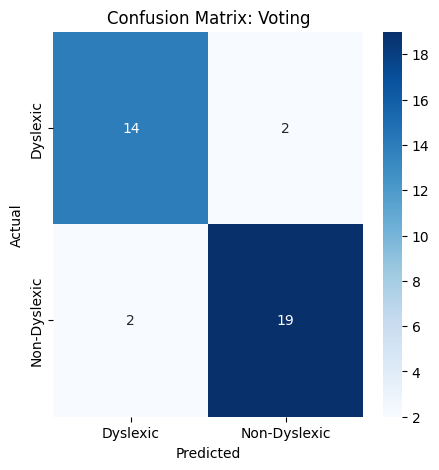

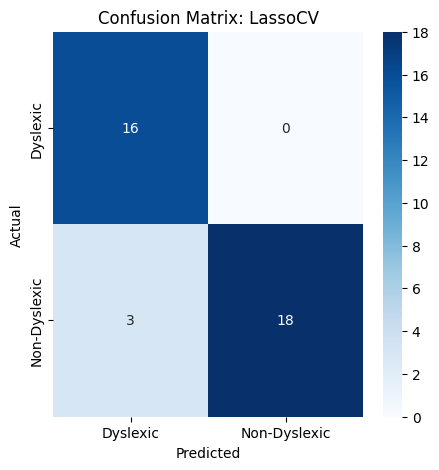

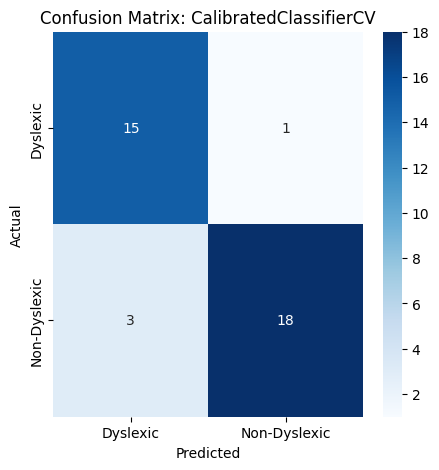

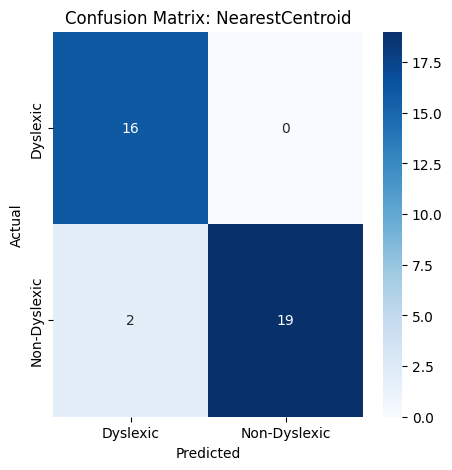

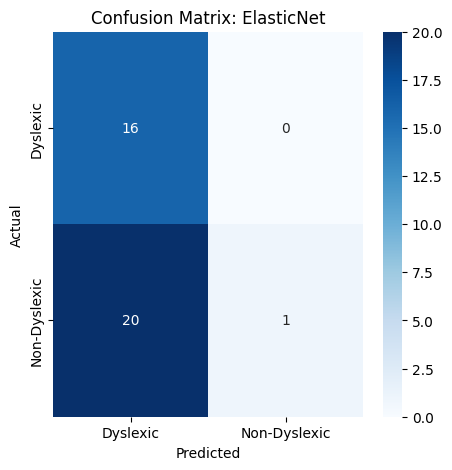

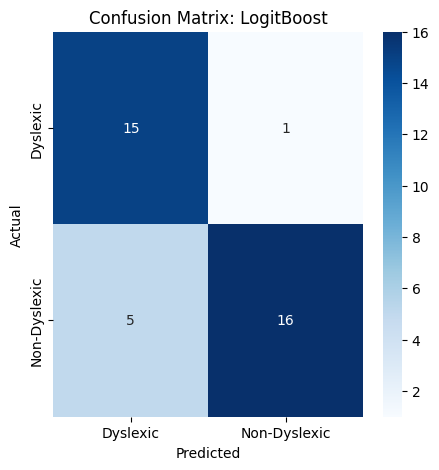

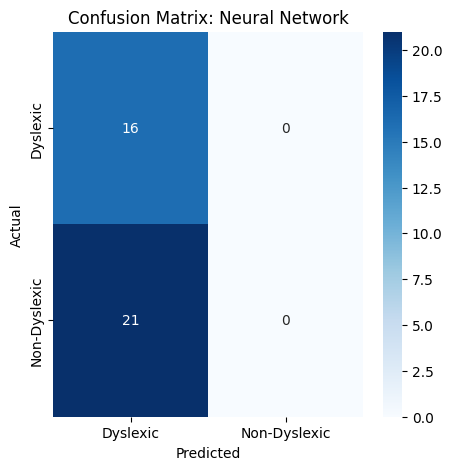

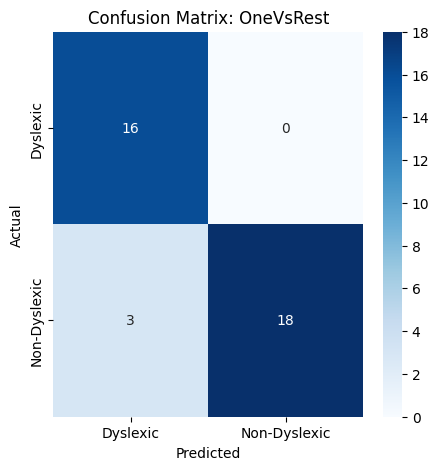

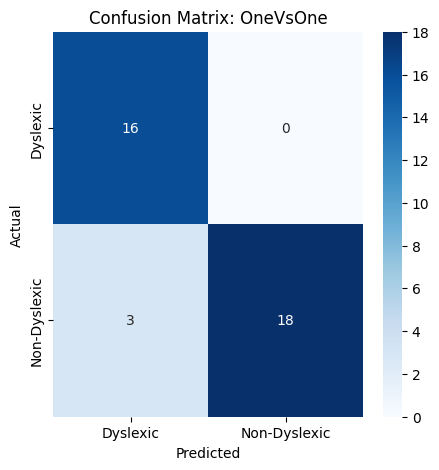

In [ ]:

!pip install catboost # Install catboost library if not installed
from catboost import CatBoostClassifier # Now you can safely import CatBoostClassifier
# Step 3: Create the 35 Classification Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier, LinearRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    HistGradientBoostingClassifier,
    StackingClassifier,
    VotingClassifier,
)
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LassoCV
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Create a dictionary of models
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'ANN': MLPClassifier(random_state=42),
    'Ridge Classifier': RidgeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Perceptron': Perceptron(random_state=42),
    'Passive Aggressive': PassiveAggressiveClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Gaussian Process': GaussianProcessClassifier(random_state=42),
    'Dummy Classifier': DummyClassifier(strategy="most_frequent"),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'Stacking': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('lr', LogisticRegression(random_state=42))
        ],
        final_estimator=LogisticRegression()
    ),
    'Voting': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('xgb', xgb.XGBClassifier(eval_metric='mlogloss', random_state=42))
        ],
        voting='soft'
    ),
    'LassoCV': LassoCV(),
    'CalibratedClassifierCV': CalibratedClassifierCV(estimator=LogisticRegression(random_state=42), cv=5),
    'NearestCentroid': KNeighborsClassifier(n_neighbors=1),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42),
    'LogitBoost': AdaBoostClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42),
    'OneVsRest': LogisticRegression(multi_class='ovr', random_state=42),
    'OneVsOne': LogisticRegression(multi_class='multinomial', random_state=42)
}

# Step 4: Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, cohen_kappa_score

# Function to calculate evaluation metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Convert predictions to binary if they are continuous (e.g., probabilities)
    y_train_pred = (y_train_pred > 0.5).astype(int)  # Apply threshold of 0.5
    y_test_pred = (y_test_pred > 0.5).astype(int)    # Apply threshold of 0.5

    # Calculate the metrics
    metrics = {}

    metrics['Accuracy (Train)'] = accuracy_score(y_train, y_train_pred) * 100
    metrics['Accuracy (Test)'] = accuracy_score(y_test, y_test_pred) * 100
    metrics['Precision (Test)'] = precision_score(y_test, y_test_pred) * 100
    metrics['Recall (Test)'] = recall_score(y_test, y_test_pred) * 100

    # Specificity = TN / (TN + FP) (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    metrics['Specificity (Test)'] = (tn / (tn + fp)) * 100

    metrics['F1 Score (Test)'] = f1_score(y_test, y_test_pred) * 100
    metrics['Kappa'] = cohen_kappa_score(y_test, y_test_pred) * 100

    # Check if `predict_proba` is available for AUC
    if hasattr(model, "predict_proba"):
        metrics['AUC'] = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100
    else:
        metrics['AUC'] = None  # Mark AUC as not available for this model

    # Confusion Matrix
    metrics['Confusion Matrix'] = confusion_matrix(y_test, y_test_pred)

    return metrics

# Step 5: Run all models and store results
results = {}

for model_name, model in models.items():
    print(f"Training and evaluating model: {model_name}")
    metrics = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test)
    results[model_name] = metrics

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame(results).transpose()

# Display the results
import seaborn as sns
import matplotlib.pyplot as plt

# Tabulate all the metrics for comparison
print(results_df)

# Step 6: Plot Confusion Matrices (Optional)
for model_name, model in models.items():
    metrics = results[model_name]
    cm = metrics['Confusion Matrix']

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic', 'Non-Dyslexic'], yticklabels=['Dyslexic', 'Non-Dyslexic'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


   Accuracy (Train)  Accuracy (Test)  Precision (Test)  Recall (Test)  \
0         95.945946        94.594595             100.0       90.47619   

   Specificity (Test)  F1 Score (Test)     Kappa   AUC    Confusion Matrix  
0               100.0             95.0  89.14956  None  [[16, 0], [2, 19]]  


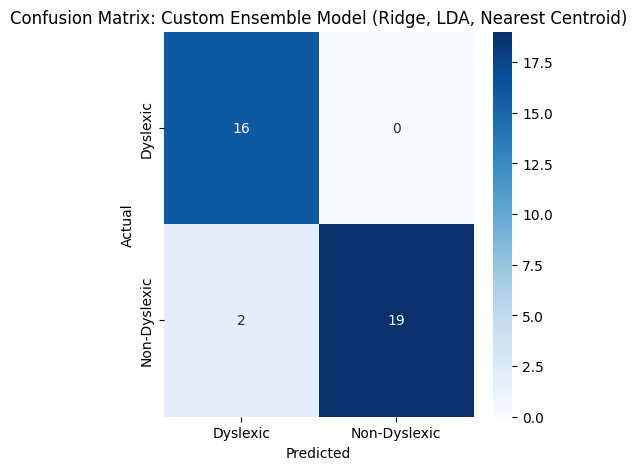

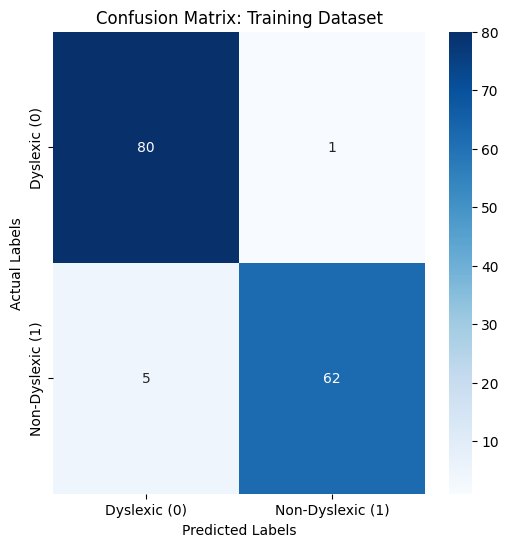

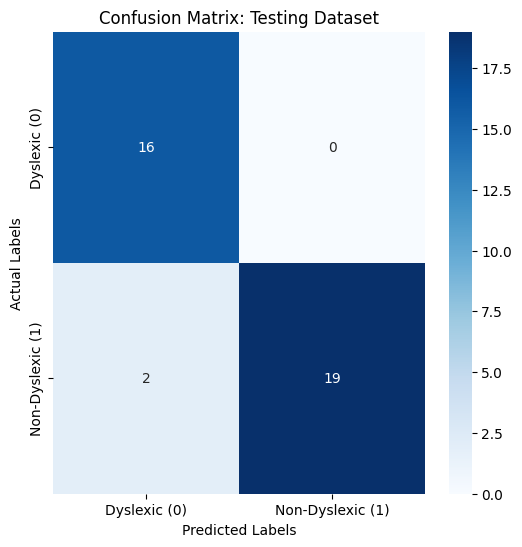

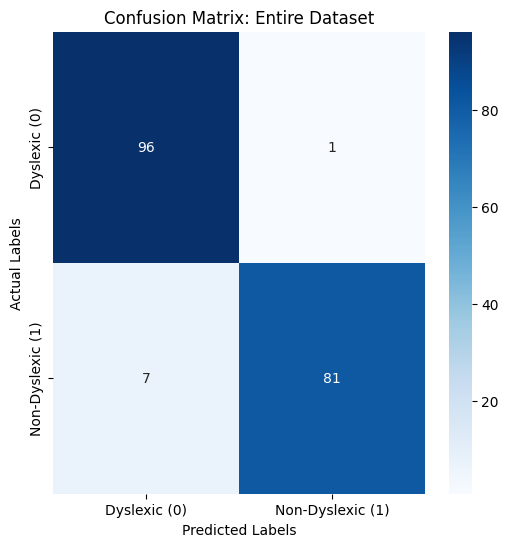

Training Dataset Metrics:
Accuracy: 95.95%
Precision: 98.41%
Recall: 92.54%
F1 Score: 95.38%
------------------------------
Testing Dataset Metrics:
Accuracy: 94.59%
Precision: 100.00%
Recall: 90.48%
F1 Score: 95.00%
------------------------------
Entire Dataset Metrics:
Accuracy: 95.68%
Precision: 98.78%
Recall: 92.05%
F1 Score: 95.29%
------------------------------


In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to sort features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 35 features based on importance
top_35_features = feature_importance_df.head(35)['Feature'].values
X_train_selected = X_train[top_35_features]
X_test_selected = X_test[top_35_features]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import  NearestCentroid
from sklearn.ensemble import VotingClassifier

# Initialize the models
ridge = RidgeClassifier()
lda = LinearDiscriminantAnalysis()
nearest_centroid = NearestCentroid()

# Create the ensemble model with Hard Voting (since Ridge and NearestCentroid don't support probabilities)
ensemble_model_custom = VotingClassifier(
    estimators=[
        ('ridge', ridge),
        ('lda', lda),
        ('nearest_centroid', nearest_centroid)
    ],
    voting='hard'  # Hard voting because Ridge and Nearest Centroid do not provide probability estimates
)

# Step 4: Train the Ensemble Model
ensemble_model_custom.fit(X_train_selected, y_train)

# Step 5: Evaluate the Ensemble Model
custom_metrics = evaluate_model(ensemble_model_custom, X_train_selected, X_test_selected, y_train, y_test)

# Convert metrics to DataFrame for better visualization
custom_metrics_df = pd.DataFrame([custom_metrics])

# Display the evaluation metrics for the custom ensemble model
print(custom_metrics_df)

# Step 6: Plot Confusion Matrix (Optional)
cm = custom_metrics['Confusion Matrix']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic', 'Non-Dyslexic'], yticklabels=['Dyslexic', 'Non-Dyslexic'])
plt.title(f'Confusion Matrix: Custom Ensemble Model (Ridge, LDA, Nearest Centroid)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Generate predictions for the training set
y_train_pred = ensemble_model_custom.predict(X_train_selected)

# Generate predictions for the testing set
y_test_pred = ensemble_model_custom.predict(X_test_selected)

# Generate predictions for the entire dataset
X_selected = X[top_35_features]  # Ensure the same top 35 features are used
y_all_pred = ensemble_model_custom.predict(X_selected)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_all = confusion_matrix(y, y_all_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Training Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot the confusion matrix for the testing set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Testing Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot the confusion matrix for the entire dataset
plt.figure(figsize=(6, 6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Entire Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Print the metrics for each dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{dataset_name} Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("-" * 30)

# Print metrics for training, testing, and entire dataset
print_metrics(y_train, y_train_pred, "Training Dataset")
print_metrics(y_test, y_test_pred, "Testing Dataset")
print_metrics(y, y_all_pred, "Entire Dataset")


FINAL MODEL ALL CONFUSION MATRIX

Optimizing hyperparameters using PSO...
Error with params [161.63742045   0.63891045   3.07240078   0.16405092]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_

Error with params [5.90389392e+02 1.12179558e-01 2.08442355e+00 5.52875727e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_

Error with params [0.1        0.30123129 2.89892719 0.50539508]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [4.12253453e+02 3.30951719e-01 1.00000000e+00 5.61827913e-01], Score: 0.8917
Error with params [9.34266684e+02 4.91482251e-01 4.41696452e+00 3.90965502e-02]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.75440437e+02 8.21608174e-01 1.00000000e+00 4.14010622e-01], Score: 0.8917
Error with params [9.67686966e+02 3.03969348e-01 4.47519081e+00 4.40304904e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_

Params: [6.20721602e+02 1.00000000e+00 1.00000000e+00 4.81071167e-01], Score: 0.8917
Params: [4.95428003e+02 1.42143907e-01 1.00000000e+00 6.54379040e-01], Score: 0.8917
Error with params [9.59848369e+02 6.24822555e-01 3.92469026e+00 3.20268000e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [7.54171171e+02 1.00000000e+00 1.00000000e+00 7.04243305e-01], Score: 0.8917
Error with params [8.28384698e+02 3.06544383e-01 4.31233204e+00 5.35558018e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.55579953e+02 9.05085102e-01 1.00000000e+00 4.13351122e-01], Score: 0.8917
Error with params [8.24507401e+02 5.28219527e-01 3.52142644e+00 5.47060726e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [8.18920878e+02 7.21946052e-01 1.07229261e+00 7.70578678e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.23063376e+02 9.72339536e-01 1.00000000e+00 1.79038414e-01], Score: 0.8917
Error with params [710.91757026   0.87759478   1.59830767   0.80628719]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [633.04174374   1.           1.           0.78179402], Score: 0.8917
Error with params [508.88342686   0.68379944   1.02084593   0.67889883]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [4.80351805e+02 8.37128029e-01 1.00000000e+00 2.79635905e-01], Score: 0.8917
Error with params [8.08282070e+02 5.96725237e-01 1.83885214e+00 6.20527984e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.10018919e+02 9.86190840e-01 1.00000000e+00 5.96186008e-01], Score: 0.8917
Params: [535.27892902   0.55928105   1.           0.71037962], Score: 0.8917
Error with params [7.11386716e+02 6.42129522e-01 2.26747611e+00 6.28334917e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [596.45127926   0.89694313   1.           0.74785042], Score: 0.8917
Error with params [635.65272112   0.71796691   2.53830912   0.67350416]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.76818542e+02 7.97384120e-01 1.00000000e+00 5.01408522e-01], Score: 0.8917
Error with params [7.70624031e+02 7.19735522e-01 3.68407862e+00 7.01146047e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [463.87202592   0.55357782   1.10907685   0.73903502]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.97917569e+02 9.69510295e-01 1.00000000e+00 5.25900219e-01], Score: 0.8917
Error with params [7.47798236e+02 1.00000000e+00 2.12801502e+00 6.44489957e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.73277777e+02 7.65497974e-01 1.00000000e+00 6.05422876e-01], Score: 0.8917
Error with params [8.13742201e+02 6.45934303e-01 3.55511591e+00 6.51128951e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [7.21811230e+02 4.09554633e-01 2.11237974e+00 7.16543947e-01], Score: -inf
Error with params [508.12176131   0.81409519   3.70210909   0.66392479]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [515.05054859   0.55012712   1.16102485   0.65214652]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.85078561e+02 9.67397357e-01 2.44327831e+00 5.57040458e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.50798741e+02 3.34588930e-01 2.26674875e+00 6.15635815e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.66857341e+02 7.44241030e-01 1.00000000e+00 6.11493077e-01], Score: 0.8917
Error with params [7.65162339e+02 6.44254162e-01 3.25606590e+00 6.20241373e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.08861785e+02 8.93662958e-01 1.00000000e+00 3.77937454e-01], Score: 0.8917
Error with params [7.09786021e+02 4.25698860e-01 2.37123520e+00 6.17742162e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [479.7883201    0.58132794   2.37534682   0.6640753 ]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [456.96702927   0.62815897   1.           0.68818932], Score: 0.8917
Error with params [6.54517066e+02 4.06699370e-01 3.04620782e+00 4.93644046e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [574.1676042    0.88837793   1.           0.73387619], Score: 0.8917
Error with params [6.67686263e+02 3.43345676e-01 3.02303146e+00 5.79861959e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [5.83615109e+02 6.52383439e-01 1.22885034e+00 4.52112641e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [425.01695844   0.58002839   1.           0.59608496], Score: 0.8917
Params: [5.38094042e+02 8.86246036e-01 1.00000000e+00 4.33311856e-01], Score: 0.8917
Error with params [7.79274852e+02 3.60329650e-01 2.51634557e+00 4.42068634e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [464.2501586    0.82033789   2.58528523   0.70008768]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [401.42988474   0.83323645   1.19187703   0.61666584]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.49910398e+02 8.79290952e-01 1.91864802e+00 4.96372585e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.72765032e+02 4.08622543e-01 3.05399384e+00 5.49867066e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.75353211e+02 7.38770975e-01 1.00000000e+00 5.35551723e-01], Score: 0.8917
Error with params [6.84194475e+02 5.34014559e-01 2.47945769e+00 6.31463856e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [439.43598937   0.76485706   2.24369807   0.70843629]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [405.44662637   0.78222566   1.2536316    0.62327815]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.77635726e+02 8.66139346e-01 1.76426326e+00 5.64633471e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [564.87799128   0.9659081    1.           0.87166249], Score: 0.8917
Error with params [550.37782458   0.78678456   1.16129925   0.55119628]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [468.70664035   0.57460819   1.           0.62853598], Score: 0.8917
Params: [571.81077184   0.86995606   1.           0.60275884], Score: 0.8917
Error with params [7.23073137e+02 4.20093193e-01 2.29568485e+00 4.55932308e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
 

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [526.86604869   0.77806814   2.6665348    0.67734353]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.63850931e+02 8.75811184e-01 1.97036100e+00 6.30117237e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [567.01709397   0.96668764   1.           0.87868027], Score: 0.8917
Error with params [557.87554761   0.82458243   1.18631253   0.62710914]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [465.62812822   0.55369718   1.           0.62028657], Score: 0.8917
Params: [539.95540371   0.86826953   1.           0.67612908], Score: 0.8917
Error with params [7.57789365e+02 5.73371355e-01 2.46049912e+00 4.64127798e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
 

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [4.08756007e+02 3.76426200e-01 1.10018847e+00 7.62939939e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.40704017e+02 4.50802949e-01 2.67289107e+00 6.13019477e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.46890070e+02 8.44646156e-01 1.00000000e+00 6.11413602e-01], Score: 0.8917
Error with params [7.77571460e+02 4.03806267e-01 3.92279558e+00 6.20468751e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [8.51824883e+02 7.29511249e-01 1.96358247e+00 4.15347968e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.93313173e+02 9.07800084e-01 1.00000000e+00 6.11421069e-01], Score: 0.8917
Params: [5.17118584e+02 9.33762867e-01 1.00000000e+00 3.87726108e-01], Score: 0.8917
Params: [444.59969521   0.65607485   1.           0.55219978], Score: 0.8917


<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.34242362e+02 4.91968851e-01 2.70331486e+00 5.38841508e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.63402567e+02 3.96341858e-01 1.92481722e+00 5.82440180e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [497.10473815   0.87121416   1.           0.57516744], Score: 0.8917
Error with params [9.22287487e+02 4.73143993e-01 1.84013979e+00 4.79378937e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [410.37547014   0.52513114   1.16702423   0.59020921]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [377.36736964   0.78659478   2.61277257   0.59555143]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [553.90897276   0.71990306   1.18875079   0.58381433]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [516.4886179    0.86606823   1.           0.56888728], Score: 0.8917
Error with params [9.17208058e+02 1.54142316e-01 2.50693390e+00 5.93449195e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.63049166e+02 9.67918567e-01 1.00000000e+00 5.41250155e-01], Score: 0.8917
Params: [4.98433053e+02 4.96076436e-01 1.00000000e+00 6.28348233e-01], Score: 0.8917
Error with params [6.25207686e+02 5.04937367e-01 3.29017548e+00 4.22489941e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [582.72842714   0.965808     1.           0.83641862], Score: 0.8917
Error with params [548.83083854   0.68780155   1.19544792   0.63152437]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [526.02289772   0.58933987   1.15320732   0.76418875]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.80049476e+02 8.55911407e-01 1.00000000e+00 4.12613224e-01], Score: 0.8917
Error with params [7.49067023e+02 8.88581279e-01 1.89880160e+00 5.85626830e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.93381140e+02 5.79574015e-01 3.56694601e+00 6.04981097e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.50886531e+02 4.15377747e-01 2.36636186e+00 5.50151592e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [8.41515246e+02 5.62272185e-01 2.44445198e+00 5.73973290e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [569.72643251   0.96712953   1.           0.88266838], Score: 0.8917
Error with params [565.38323816   0.65235706   1.1686996    0.60165649]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [481.45735842   0.64718382   1.08976782   0.7735241 ]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_

Error with params [7.05311826e+02 8.95080704e-01 2.05048376e+00 6.44907976e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [9.77067427e+02 5.65858341e-01 2.12942968e+00 6.12356360e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.43456352e+02 9.32498316e-01 1.00000000e+00 6.01417631e-01], Score: 0.8917
Params: [535.48486299   0.94207342   1.           0.66990449], Score: 0.8917
Params: [480.61988617   0.53699341   1.           0.67895725], Score: 0.8917
Error with params [7.29577156e+02 3.61965723e-01 1.99645211e+00 5.10138862e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/di

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [584.00868748   0.90395477   1.           0.7351459 ], Score: 0.8917
Error with params [6.43245756e+02 3.09445207e-01 3.31793965e+00 6.77781287e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [462.85075295   0.58579661   1.           0.67728533], Score: 0.8917
Error with params [7.50002530e+02 4.34496960e-01 2.75671621e+00 5.30799930e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [573.39473449   0.97162699   1.           0.91665819], Score: 0.8917
Error with params [577.02421522   0.85459967   1.32735904   0.59651144]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.85717727e+02 4.52375994e-01 1.95915089e+00 4.16534932e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.26184836e+02 3.02800913e-01 3.11940322e+00 5.80837767e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [614.76164742   0.88245128   1.           0.66377973], Score: 0.8917
Error with params [7.85426136e+02 4.71870312e-01 3.63411261e+00 6.34056710e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [438.86470281   0.76624471   1.20271687   0.63226412]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree



Params: [583.84860046   0.90322956   1.           0.73527543], Score: 0.8917
Error with params [7.02269297e+02 4.73825689e-01 2.74046127e+00 5.81999585e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, i

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [573.49664098   0.76034448   1.27995043   0.60443762]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [8.37601028e+02 4.30267355e-01 2.00873382e+00 6.31653394e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.67773777e+02 8.92949377e-01 1.92826734e+00 6.11355975e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [564.49389085   0.71553876   1.16614173   0.61719497]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [385.62884245   0.481308     1.26136697   0.60091611]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [584.06994406   0.90317202   1.           0.73520706], Score: 0.8917
Error with params [6.91669783e+02 5.35522162e-01 2.74716730e+00 6.24358879e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.83421925e+02 8.63118081e-01 1.00000000e+00 5.68277332e-01], Score: 0.8917
Error with params [6.69717020e+02 6.26505663e-01 2.24634212e+00 6.89253299e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [8.61759069e+02 5.18273121e-01 3.03157975e+00 4.70504855e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.18374992e+02 9.40394378e-01 1.00000000e+00 5.16176814e-01], Score: 0.8917
Params: [446.78663162   0.50795889   1.           0.63234339], Score: 0.8917
Error with params [6.93499043e+02 3.98111549e-01 2.80295639e+00 5.48123352e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [8.10633299e+02 8.91966289e-01 1.73227079e+00 5.56595075e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [576.93317193   0.95796196   1.           0.95731238], Score: 0.8917
Error with params [561.64261201   0.78782127   1.11466636   0.60217809]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [4.88071326e+02 4.41507749e-01 1.00000000e+00 6.52259488e-01], Score: 0.8917
Params: [522.67594153   0.87717207   1.           0.60429059], Score: 0.8917
Error with params [8.60307616e+02 4.46945522e-01 3.16537792e+00 4.32974512e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [502.20935767   0.77211193   3.1601895    0.65702692]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [329.53846508   0.72795252   2.48073648   0.45647724]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [566.14435843   0.78085036   1.16750644   0.58098953]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [513.32717839   0.86553448   1.           0.65562274], Score: 0.8917
Error with params [8.01802791e+02 4.48622082e-01 2.60985426e+00 3.85534000e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [447.73914729   0.7481728    1.12549951   0.61160991]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [300.38577088   0.7914807    1.94098082   0.41312094]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [576.52391028   0.97457541   1.           0.78768443], Score: 0.8917
Error with params [5.61501431e+02 7.88403092e-01 1.21131516e+00 5.48503824e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [509.13214818   0.85905514   1.           0.63232639], Score: 0.8917
Error with params [7.97706069e+02 3.99964455e-01 2.49704904e+00 4.89474251e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.79216218e+02 9.34010752e-01 1.00000000e+00 5.83874151e-01], Score: 0.8917
Params: [5.40433847e+02 9.35331121e-01 1.00000000e+00 5.19364333e-01], Score: 0.8917
Params: [484.16602458   0.52258403   1.           0.63465075], Score: 0.8917
Error with params [6.89437130e+02 5.44100226e-01 2.47713823e+00 5.77437862e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/pytho

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [7.35189387e+02 8.94280367e-01 1.91546974e+00 5.34144919e-01], Score: -inf
Error with params [346.00684548   0.77784741   1.51527336   0.50306859]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [576.09086873   0.94803372   1.           0.80961059], Score: 0.8917
Error with params [5.60531060e+02 7.82091643e-01 1.25081834e+00 5.25319376e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [536.38041546   0.62953445   1.           0.60557295], Score: 0.8917
Params: [494.9954051    0.86616133   1.           0.5902181 ], Score: 0.8917
Error with params [7.94378831e+02 4.21115749e-01 2.20313372e+00 6.42848712e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
 

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [5.35115080e+02 4.27011627e-01 1.06501652e+00 7.56846473e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.79745473e+02 8.74660057e-01 1.00000000e+00 4.44608639e-01], Score: 0.8917
Error with params [7.69305456e+02 8.93874530e-01 2.17363050e+00 5.02263315e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.73766160e+02 3.77639303e-01 2.04778295e+00 5.24266383e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [8.17768574e+02 2.58170540e-01 2.13630376e+00 6.17301347e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.31462584e+02 9.18262182e-01 1.00000000e+00 5.94176469e-01], Score: 0.8917
Params: [4.82994732e+02 9.58154479e-01 1.00000000e+00 4.33130266e-01], Score: 0.8917
Params: [496.51547532   0.53638384   1.           0.63677648], Score: 0.8917
Error with params [6.63789103e+02 6.58374680e-01 3.14134179e+00 5.45998438e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/pytho

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.79872049e+02 8.51204570e-01 1.00000000e+00 3.51821645e-01], Score: 0.8917
Error with params [7.67811811e+02 8.93475250e-01 1.82989536e+00 5.36260604e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [555.81587787   0.73004973   1.18935866   0.55857697]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [462.55535507   0.80836921   2.65665281   0.67502234]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.12734043e+02 6.84691719e-01 2.98414867e+00 4.62214428e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.87860366e+02 7.93607325e-01 1.00000000e+00 6.25640640e-01], Score: 0.8917
Error with params [7.75180972e+02 4.68740773e-01 2.96267747e+00 6.47712114e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.26647743e+02 8.63137751e-01 1.00000000e+00 4.43794839e-01], Score: 0.8917
Error with params [7.92163423e+02 9.93699598e-02 3.08416367e+00 5.08078332e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [527.03704186   0.96590738   1.           0.61749076], Score: 0.8917
Params: [529.37831233   0.53591539   1.           0.68369992], Score: 0.8917
Error with params [7.14513954e+02 4.82245385e-01 2.46947792e+00 5.22557132e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
 

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [382.4652415    0.87019956   2.10000346   0.44097143]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [578.56372935   0.99072892   1.           0.93343025], Score: 0.8917
Error with params [556.96443947   0.74458632   1.1719707    0.64593369]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.44631203e+02 8.61462162e-01 1.00000000e+00 4.28969128e-01], Score: 0.8917
Error with params [8.50243636e+02 3.52182674e-01 3.31011121e+00 5.00100552e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [304.50980931   0.58404721   1.20206887   0.63106968]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree



Params: [3.94794038e+02 8.71675557e-01 2.07422680e+00 3.91964584e-01], Score: -inf
Params: [583.99749535   0.90329766   1.           0.73522201], Score: 0.8917
Error with params [6.65067091e+02 6.27743940e-01 2.58812163e+00 6.49396835e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [556.0135798    0.76876153   1.22514614   0.69027787]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.88773110e+02 6.58149949e-01 3.51873934e+00 6.27445612e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [503.80931559   0.78925195   3.2757251    0.67309353]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.80712437e+02 8.56208642e-01 1.00000000e+00 1.16000581e-01], Score: 0.8917
Error with params [6.87066129e+02 8.92797787e-01 2.12347351e+00 5.99329772e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.57591106e+02 7.98888259e-01 1.00000000e+00 5.93867517e-01], Score: 0.8917
Error with params [7.02618358e+02 5.82820049e-01 3.89292112e+00 6.10583229e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [402.55168899   0.6228039    1.18789563   0.62111499]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [352.49483008   0.7807019    1.67167175   0.46291418]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.69913903e+02 5.17645691e-01 3.73710411e+00 6.02370683e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.63907361e+02 9.35756190e-01 1.00000000e+00 6.03840632e-01], Score: 0.8917
Params: [5.33055928e+02 9.48157952e-01 1.00000000e+00 5.24057486e-01], Score: 0.8917
Params: [476.49926224   0.68938462   1.           0.61251306], Score: 0.8917
Error with params [7.10496082e+02 5.09451598e-01 2.79634171e+00 3.37738177e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/pytho

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [583.99095499   0.90330179   1.           0.73522346], Score: 0.8917
Error with params [6.54456694e+02 3.60289406e-01 2.88756433e+00 5.55210622e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [5.23896661e+02 8.48055089e-01 1.00000000e+00 4.78127500e-01], Score: 0.8917
Error with params [8.17362273e+02 4.12977950e-01 2.02447798e+00 4.66195473e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [468.56376904   0.61477596   1.           0.62132205], Score: 0.8917
Error with params [6.98436618e+02 3.97983079e-01 2.64088848e+00 4.65978344e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [575.34038531   0.93772963   1.           0.83263255], Score: 0.8917
Error with params [5.79103925e+02 7.50501939e-01 1.29426371e+00 4.70714679e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [517.72711631   0.86126068   1.           0.57990062], Score: 0.8917
Error with params [7.95317839e+02 6.40023389e-01 2.00326786e+00 5.02851465e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [376.21364457   0.56155909   1.07705421   0.56368749]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.31430597e+02 3.92470704e-01 2.54596043e+00 5.71149125e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [7.46694495e+02 8.05539874e-01 1.00000000e+00 6.92844415e-01], Score: 0.8917
Error with params [8.67743974e+02 3.88681153e-01 3.08087190e+00 6.75894780e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.87444389e+02 7.48034086e-01 2.55197482e+00 4.92380025e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.99376598e+02 3.78769595e-01 2.90309024e+00 5.49613423e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [421.92464494   0.84797299   1.           0.70115497], Score: 0.8917
Params: [533.01869793   0.88075178   1.           0.54774048], Score: 0.8917
Error with params [8.30613111e+02 8.45551408e-01 2.75357680e+00 4.66820396e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
 

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [478.41138826   0.51231024   1.19514721   0.59864985]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.00736597e+02 5.29444940e-01 2.20139983e+00 5.72098561e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.71296598e+02 4.64103210e-01 2.61132554e+00 6.08307198e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [493.62104854   0.55999818   1.05989119   0.75563767]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.40333865e+02 8.92184277e-01 1.87930880e+00 5.77721898e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [578.46123176   0.95294203   1.           0.81948892], Score: 0.8917
Error with params [565.36192376   0.75006922   1.20322075   0.57260639]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [460.13550223   0.63838067   1.           0.6813855 ], Score: 0.8917
Params: [535.33061934   0.87391002   1.           0.57090995], Score: 0.8917
Error with params [8.20950000e+02 3.75395837e-01 2.58142669e+00 3.99142773e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
 

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [510.86717053   0.79490963   2.66400889   0.66513962]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [583.99207047   0.90330125   1.           0.73522336], Score: 0.8917
Error with params [6.88354027e+02 3.92241770e-01 2.50763566e+00 5.93026029e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.93367680e+02 7.89721081e-01 1.00000000e+00 6.33555847e-01], Score: 0.8917
Error with params [7.76760606e+02 4.38298361e-01 2.82345668e+00 6.27858021e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [8.59322704e+02 4.36538182e-01 2.16344742e+00 4.31680334e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.73135811e+02 9.21948895e-01 1.00000000e+00 5.99349132e-01], Score: 0.8917
Params: [519.2756621    0.96502538   1.           0.60773904], Score: 0.8917
Params: [457.90695847   0.60776718   1.           0.6676387 ], Score: 0.8917


<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.39868014e+02 5.45425130e-01 2.59708253e+00 6.48189311e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [7.24682274e+02 8.43374486e-01 1.00000000e+00 6.36443868e-01], Score: 0.8917
Error with params [8.16322457e+02 3.74474467e-01 2.88247208e+00 6.28812201e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [534.2387168    0.86361262   1.           0.65380859], Score: 0.8917
Error with params [8.03481686e+02 3.14444969e-01 2.69227275e+00 4.89365623e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [410.62193552   0.59986933   1.13724256   0.6851427 ]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.35362938e+02 4.56054640e-01 2.26140248e+00 5.40815604e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.66025841e+02 4.38362975e-01 2.65765337e+00 6.22730843e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [459.61825336   0.5626695    1.           0.61572608], Score: 0.8917
Error with params [6.82356441e+02 5.46963396e-01 2.60750114e+00 4.39497944e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [572.81576009   0.94123178   1.           0.85879368], Score: 0.8917
Error with params [567.93031445   0.6864486    1.13918552   0.60540374]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _valida

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [446.96352911   0.6147844    2.44437172   0.66722707]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.83105307e+02 5.85010962e-01 2.77199290e+00 4.17471621e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [5.70199613e+02 7.75362491e-01 1.07372812e+00 5.60284749e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [488.99688634   0.51536427   1.13846752   0.77665366]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [6.85624516e+02 4.74208854e-01 2.46225171e+00 4.01440423e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [457.44189156   0.70116423   2.45507263   0.66725972]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.16708472e+02 2.65509364e-01 2.60884578e+00 4.41503587e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [635.39150988   0.83885554   1.           0.66196411], Score: 0.8917
Error with params [7.88864983e+02 5.87981465e-01 2.42777637e+00 5.99220186e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [503.71405055   0.75618623   1.27950317   0.5407538 ]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [7.59670841e+02 9.00498651e-01 2.62890953e+00 6.08496286e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Params: [6.33594494e+02 8.56644269e-01 1.00000000e+00 6.17206917e-01], Score: 0.8917
Error with params [6.98704820e+02 5.38407177e-01 3.22616352e+00 5.90836087e-01]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree
<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Error with params [482.86834461   0.58501575   1.15193485   0.56458887]: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

<ipython-input-45-d6654f9c8865>:19: RuntimeWarning: invalid value encountered in power
  poly_component = (gamma * linear_component + coef0) ** degree


Test Kernel Shape: (37, 148)
Test Accuracy: 91.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.86      0.92        21

    accuracy                           0.92        37
   macro avg       0.92      0.93      0.92        37
weighted avg       0.93      0.92      0.92        37



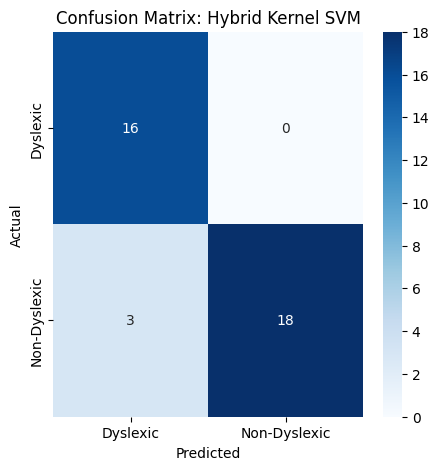

Test Accuracy: 91.89%


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from pyswarm import pso  # Python Swarm Optimization library
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Step 1: Hybrid Kernel Function
def hybrid_kernel(X, Y, params):
    """
    Computes a custom hybrid kernel combining RBF, polynomial, and linear components.
    """
    gamma, degree, coef0 = params  # Parameters for the hybrid kernel
    linear_component = np.dot(X, Y.T)
    rbf_component = np.exp(-gamma * cdist(X, Y, metric='sqeuclidean'))
    poly_component = (gamma * linear_component + coef0) ** degree
    return rbf_component + poly_component + linear_component

# Step 2: Objective Function for PSO
def svm_pso_objective(params, X_train, y_train, cv_folds):
    """
    Objective function for PSO to optimize SVM hyperparameters.
    """
    C, gamma, degree, coef0 = params
    svc = SVC(C=C, kernel='precomputed', random_state=42)
    hybrid_train_kernel = hybrid_kernel(X_train, X_train, (gamma, degree, coef0))
    try:
        score = cross_val_score(svc, hybrid_train_kernel, y_train, cv=cv_folds, scoring='accuracy')
        return -score.mean()  # Negative accuracy for minimization
    except Exception as e:
        print(f"Error with params {params}: {e}")
        return np.inf  # Return a very high value for invalid params

# Step 3: PSO Optimization Function
def optimize_hybrid_svm(X_train, y_train, cv_folds=5):
    """
    Uses PSO to find the optimal hyperparameters for the hybrid kernel SVM.
    """
    # Define bounds for hyperparameters
    bounds = [
        (0.1, 1000),  # C
        (0.0001, 1),  # gamma
        (1, 5),       # degree
        (0, 1)        # coef0
    ]

    # Objective function wrapper
    def objective(params):
        score = svm_pso_objective(params, X_train, y_train, cv_folds)
        print(f"Params: {params}, Score: {-score:.4f}")
        return score

    # Run PSO optimization
    best_params, _ = pso(objective, lb=[b[0] for b in bounds], ub=[b[1] for b in bounds], swarmsize=20, maxiter=50)
    return best_params

# Step 4: Training and Evaluation
def train_hybrid_svm(X_train, X_test, y_train, y_test):
    """
    Optimizes, trains, and evaluates the hybrid kernel SVM.
    """
    print("Optimizing hyperparameters using PSO...")
    C, gamma, degree, coef0 = optimize_hybrid_svm(X_train, y_train)
    print(f"Best Parameters: C={C}, gamma={gamma}, degree={degree}, coef0={coef0}")

    # Train the SVM with the best parameters
    svc = SVC(C=C, kernel='precomputed', probability=True, random_state=42)
    hybrid_train_kernel = hybrid_kernel(X_train, X_train, (gamma, degree, coef0))
    print("Train Kernel Shape:", hybrid_train_kernel.shape)
    svc.fit(hybrid_train_kernel, y_train)

    # Test the model
    hybrid_test_kernel = hybrid_kernel(X_test, X_train, (gamma, degree, coef0))
    print("Test Kernel Shape:", hybrid_test_kernel.shape)
    y_pred = svc.predict(hybrid_test_kernel)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic', 'Non-Dyslexic'], yticklabels=['Dyslexic', 'Non-Dyslexic'])
    plt.title('Confusion Matrix: Hybrid Kernel SVM')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    return svc, accuracy

# Step 5: Load Data and Run
# Assuming df is already loaded and cleaned
y = df.iloc[:, 0]  # Target column
X = df.iloc[:, 2:]  # Feature columns

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate the model
hybrid_svm_model, test_accuracy = train_hybrid_svm(X_train, X_test, y_train, y_test)


CONFUSION MATRIX FOR ALL THE RECORDS

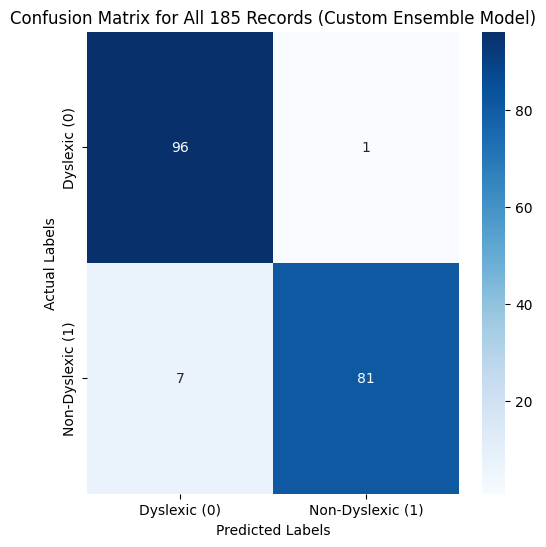

Accuracy: 95.68%
Precision: 98.78%
Recall: 92.05%
F1 Score: 95.29%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming the dataset is already loaded into 'df', with 'Label' column as the target variable
# Handle categorical columns by encoding them
label_encoder = LabelEncoder()

# Apply LabelEncoder to all non-numeric columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Extract the 'Label' column as the target variable
y = df['Label'].values  # Actual labels (0 for Dyslexic, 1 for Non-Dyslexic)

# Select the feature columns (assuming features start from column 1 onwards, you can adjust based on your dataset)
X = df.drop(columns=['Label'])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to sort features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 35 features based on importance
top_35_features = feature_importance_df.head(35)['Feature'].values

# Ensure that we are selecting the same columns in both X_train and X_test
X_train_selected = X_train[top_35_features]
X_test_selected = X_test[top_35_features]

# Initialize the models
ridge = RidgeClassifier()
lda = LinearDiscriminantAnalysis()
nearest_centroid = NearestCentroid()

# Create the ensemble model with Hard Voting
ensemble_model_custom = VotingClassifier(
    estimators=[
        ('ridge', ridge),
        ('lda', lda),
        ('nearest_centroid', nearest_centroid)
    ],
    voting='hard'  # Hard voting because Ridge and Nearest Centroid do not provide probability estimates
)

# Train the ensemble model
ensemble_model_custom.fit(X_train_selected, y_train)

# Make predictions for the entire dataset (both training and testing data)
y_pred_all = ensemble_model_custom.predict(X[top_35_features])

# Generate the confusion matrix for all records
cm_all = confusion_matrix(y, y_pred_all)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix for All 185 Records (Custom Ensemble Model)')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate the overall accuracy, precision, recall, and other metrics for all records
accuracy_all = accuracy_score(y, y_pred_all)
precision_all = precision_score(y, y_pred_all)
recall_all = recall_score(y, y_pred_all)
f1_all = f1_score(y, y_pred_all)

print(f"Accuracy: {accuracy_all * 100:.2f}%")
print(f"Precision: {precision_all * 100:.2f}%")
print(f"Recall: {recall_all * 100:.2f}%")
print(f"F1 Score: {f1_all * 100:.2f}%")


FINAL ENSEMBLE MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


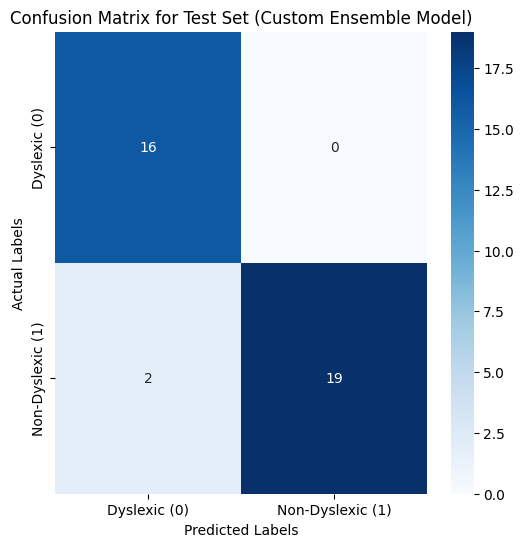

Accuracy (Test): 94.59%
Precision (Test): 100.00%
Recall (Test): 90.48%
F1 Score (Test): 95.00%
Cross-validated Accuracy: 93.51%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into 'df'
# Encode categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Extract the target variable ('Label') and features
y = df['Label'].values  # Target variable: 0 for Dyslexic, 1 for Non-Dyslexic
X = df.drop(columns=['Label'])  # Feature variables

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Feature selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 35 features
top_35_features = feature_importance_df.head(24)['Feature'].values
X_train_selected = X_train[top_35_features]
X_test_selected = X_test[top_35_features]

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

# Initialize the models
ridge = RidgeClassifier(alpha=1.0)
lda = LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')
nearest_centroid = NearestCentroid(metric='manhattan')

# Create the ensemble model with Hard Voting
ensemble_model_custom = VotingClassifier(
    estimators=[
        ('ridge', ridge),
        ('lda', lda),
        ('nearest_centroid', nearest_centroid)
    ],
    voting='hard'
)

# Train the ensemble model
ensemble_model_custom.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the test set
y_pred_test = ensemble_model_custom.predict(X_test_selected)
cm_test = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix for the test set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix for Test Set (Custom Ensemble Model)')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy (Test): {accuracy_test * 100:.2f}%")
print(f"Precision (Test): {precision_test * 100:.2f}%")
print(f"Recall (Test): {recall_test * 100:.2f}%")
print(f"F1 Score (Test): {f1_test * 100:.2f}%")

# Evaluate on the full dataset using cross-validation
scores = cross_val_score(ensemble_model_custom, X[top_35_features], y, cv=5)
print(f"Cross-validated Accuracy: {scores.mean() * 100:.2f}%")


DIFFERENT CONFUSION MATRIX FOR THE MODEL

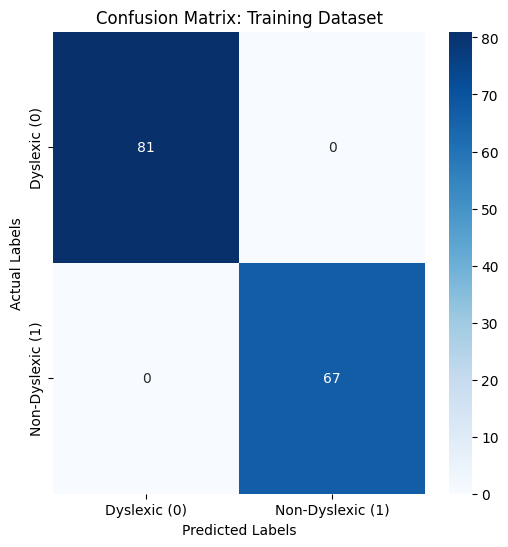

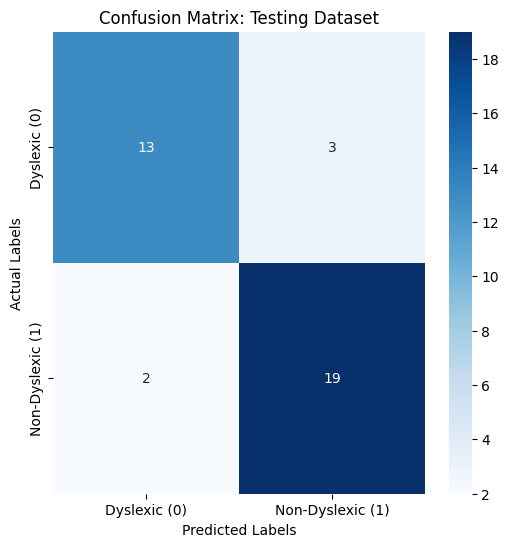

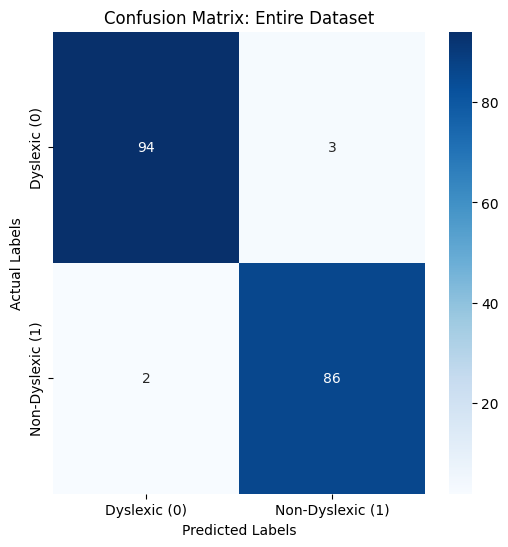

Training Dataset Metrics:
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
------------------------------
Testing Dataset Metrics:
Accuracy: 86.49%
Precision: 86.36%
Recall: 90.48%
F1 Score: 88.37%
------------------------------
Entire Dataset Metrics:
Accuracy: 97.30%
Precision: 96.63%
Recall: 97.73%
F1 Score: 97.18%
------------------------------


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming the dataset is already loaded into 'df', with 'Label' column as the target variable

# Extract the 'Label' column as the target variable
y = df['Label'].values  # Actual labels (0 for Dyslexic, 1 for Non-Dyslexic)

# Select the feature columns
X = df.drop(columns=['Label'])

# Handle categorical columns by encoding them
label_encoder = LabelEncoder()

for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Ensure the entire dataset is numeric
X = X.apply(pd.to_numeric)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to sort features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 35 features based on importance
top_35_features = feature_importance_df.head(35)['Feature'].values
X_train_selected = X_train[top_35_features]
X_test_selected = X_test[top_35_features]

# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting Model
gradient_boosting_model.fit(X_train_selected, y_train)

# Generate predictions for the training set
y_train_pred = gradient_boosting_model.predict(X_train_selected)

# Generate predictions for the testing set
y_test_pred = gradient_boosting_model.predict(X_test_selected)

# Generate predictions for the entire dataset
X_selected = X[top_35_features]  # Ensure the same top 35 features are used
y_all_pred = gradient_boosting_model.predict(X_selected)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_all = confusion_matrix(y, y_all_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Training Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot the confusion matrix for the testing set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Testing Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot the confusion matrix for the entire dataset
plt.figure(figsize=(6, 6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Entire Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{dataset_name} Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("-" * 30)

# Print metrics for training, testing, and entire dataset
print_metrics(y_train, y_train_pred, "Training Dataset")
print_metrics(y_test, y_test_pred, "Testing Dataset")
print_metrics(y, y_all_pred, "Entire Dataset")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


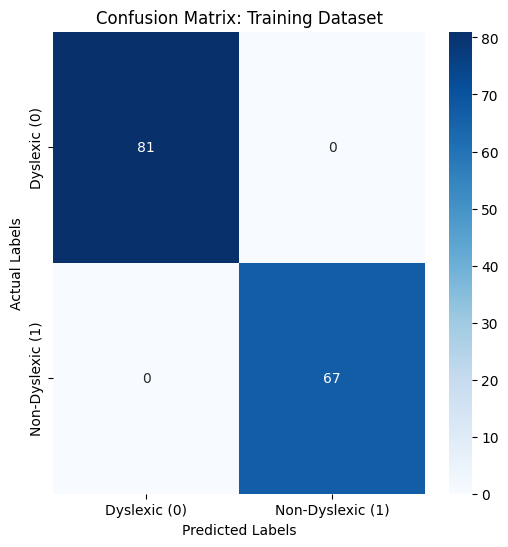

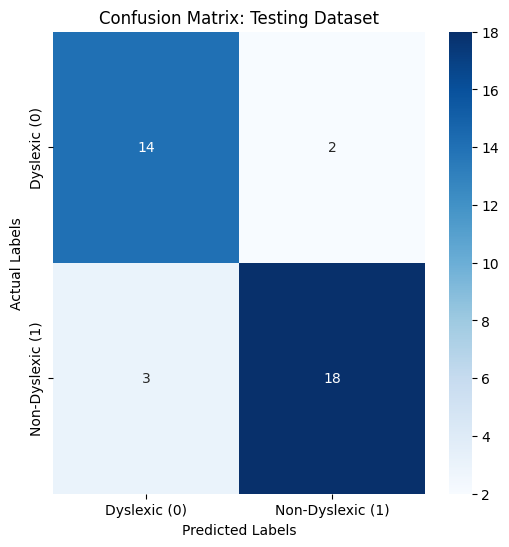

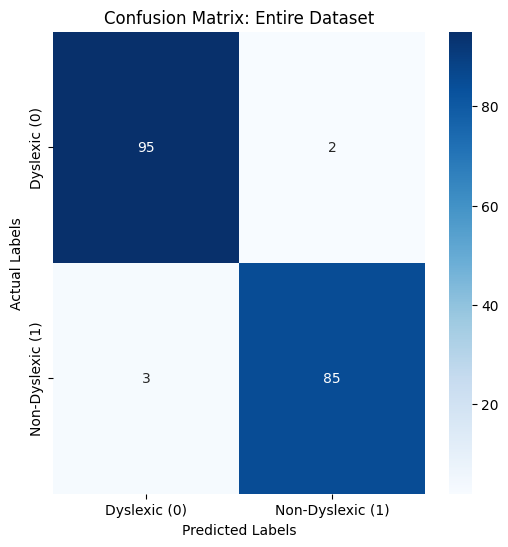

Training Dataset Metrics:
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
------------------------------
Testing Dataset Metrics:
Accuracy: 86.49%
Precision: 90.00%
Recall: 85.71%
F1 Score: 87.80%
------------------------------
Entire Dataset Metrics:
Accuracy: 97.30%
Precision: 97.70%
Recall: 96.59%
F1 Score: 97.14%
------------------------------


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming the dataset is already loaded into 'df', with 'Label' column as the target variable

# Extract the 'Label' column as the target variable
y = df['Label'].values  # Actual labels (0 for Dyslexic, 1 for Non-Dyslexic)

# Select the feature columns
X = df.drop(columns=['Label'])

# Handle categorical columns by encoding them
label_encoder = LabelEncoder()

for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Ensure the entire dataset is numeric
X = X.apply(pd.to_numeric)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to sort features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 35 features based on importance
top_35_features = feature_importance_df.head(35)['Feature'].values
X_train_selected = X_train[top_35_features]
X_test_selected = X_test[top_35_features]

# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train_selected, y_train)

# Generate predictions for the training set
y_train_pred = adaboost_model.predict(X_train_selected)

# Generate predictions for the testing set
y_test_pred = adaboost_model.predict(X_test_selected)

# Generate predictions for the entire dataset
X_selected = X[top_35_features]  # Ensure the same top 35 features are used
y_all_pred = adaboost_model.predict(X_selected)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_all = confusion_matrix(y, y_all_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Training Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot the confusion matrix for the testing set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Testing Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot the confusion matrix for the entire dataset
plt.figure(figsize=(6, 6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues', xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix: Entire Dataset')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{dataset_name} Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("-" * 30)

# Print metrics for training, testing, and entire dataset
print_metrics(y_train, y_train_pred, "Training Dataset")
print_metrics(y_test, y_test_pred, "Testing Dataset")
print_metrics(y, y_all_pred, "Entire Dataset")


Trial 10 Complete [00h 00m 17s]
val_accuracy: 0.9189189076423645

Best val_accuracy So Far: 0.9594594538211823
Total elapsed time: 00h 03m 09s
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4350 - loss: 0.8804 - val_accuracy: 0.3243 - val_loss: 0.8687
Epoch 2/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6875 - loss: 0.6274

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5572 - loss: 0.7187 - val_accuracy: 0.4595 - val_loss: 0.7746
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5894 - loss: 0.6642 - val_accuracy: 0.5135 - val_loss: 0.7004
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6132 - loss: 0.6586 - val_accuracy: 0.6486 - val_loss: 0.6453
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6941 - loss: 0.5801 - val_accuracy: 0.7297 - val_loss: 0.6058
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6684 - loss: 0.5882 - val_accuracy: 0.7568 - val_loss: 0.5716
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7837 - loss: 0.5277 - val_accuracy: 0.7838 - val_loss: 0.5423
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7425 - loss: 0.4811 - val_accuracy: 0.7838 - val_loss: 0.5199
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7714 - loss: 0.4974 - val_accuracy: 0.7838 - val_loss: 0.5026
Epoch 10/50

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


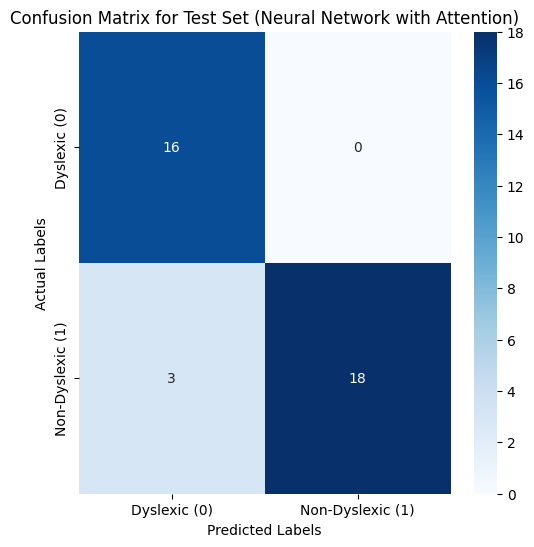

Accuracy (Test): 91.89%
Precision (Test): 100.00%
Recall (Test): 85.71%
F1 Score (Test): 92.31%


In [ ]:
!pip install tensorflow scikit-learn keras-tuner
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Attention, Flatten, Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import keras_tuner as kt

# Encode categorical columns in the dataset
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Extract the target variable ('Label') and features
y = df['Label'].values  # Target variable: 0 for Dyslexic, 1 for Non-Dyslexic
X = df.drop(columns=['Label'])  # Feature variables

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Define the model-building function for Keras Tuner
def build_model(hp):
    input_layer = Input(shape=(X_train.shape[1],))

    # Hidden layers with dynamically tuned neurons and dropout
    x = Dense(units=hp.Choice('units_layer1', [32, 64, 128, 256]), activation='relu')(input_layer)
    x = Dropout(rate=hp.Float('dropout_layer1', 0.2, 0.5, step=0.1))(x)
    x = Dense(units=hp.Choice('units_layer2', [16, 32, 64, 128]), activation='relu')(x)
    x = Dropout(rate=hp.Float('dropout_layer2', 0.2, 0.5, step=0.1))(x)

    # Attention mechanism
    x = Reshape((1, hp.get('units_layer2')))(x)  # Add sequence dimension
    attention_layer = Attention()([x, x])
    x = Flatten()(attention_layer)

    # Output layer
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of times each model is trained
    directory='my_dir',
    project_name='dyslexia_model_tuning')

# Perform the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_test = (model.predict(X_test) > 0.5).astype('int32')

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix for Test Set (Neural Network with Attention)')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy (Test): {accuracy_test * 100:.2f}%")
print(f"Precision (Test): {precision_test * 100:.2f}%")
print(f"Recall (Test): {recall_test * 100:.2f}%")
print(f"F1 Score (Test): {f1_test * 100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/5 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.4375 - loss: 1.2097

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 336ms/step - accuracy: 0.5310 - loss: 0.9278 - val_accuracy: 0.7297 - val_loss: 0.5767
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6620 - loss: 0.7322 - val_accuracy: 0.8378 - val_loss: 0.5261
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6217 - loss: 0.7174 - val_accuracy: 0.8649 - val_loss: 0.4922
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6842 - loss: 0.6726 - val_accuracy: 0.8649 - val_loss: 0.4671
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6755 - loss: 0.6130 - val_accuracy: 0.8108 - val_loss: 0.4478
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6355 - loss: 0.5957 - val_accuracy: 0.8108 - val_loss: 0.4309
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7307 - loss: 0.5069 - val_accuracy: 0.8108 - val_loss: 0.4133
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7486 - loss: 0.5128 - val_accuracy: 0.8108 - val_loss: 0.3983
Epoch 9/50

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (11070, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (11070, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10878, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-pac

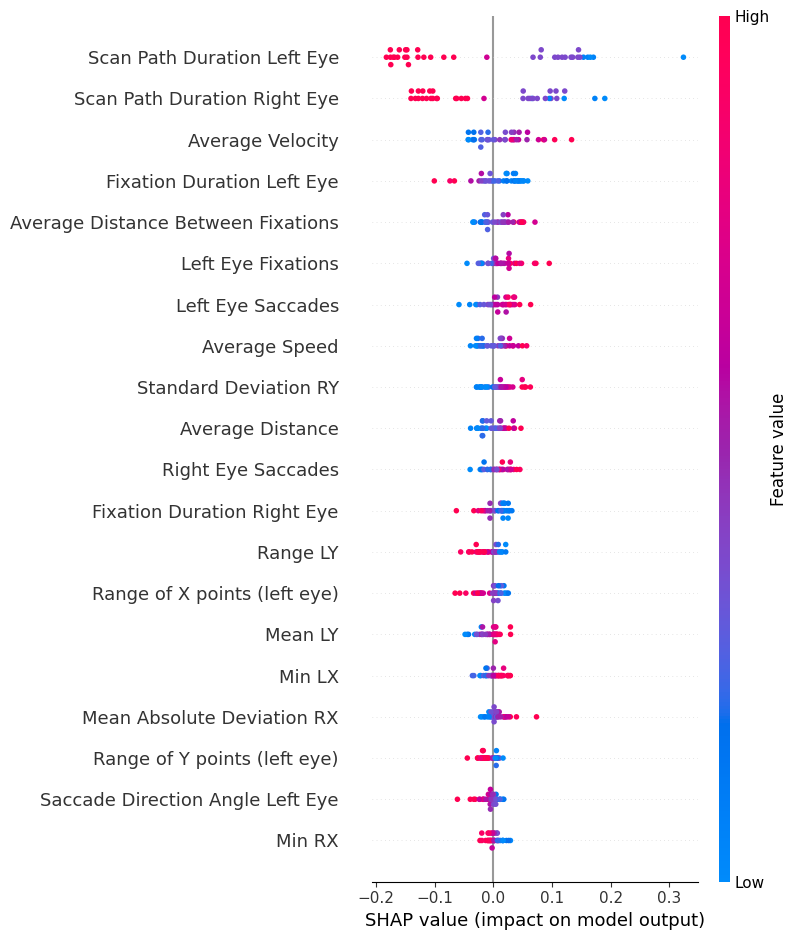

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


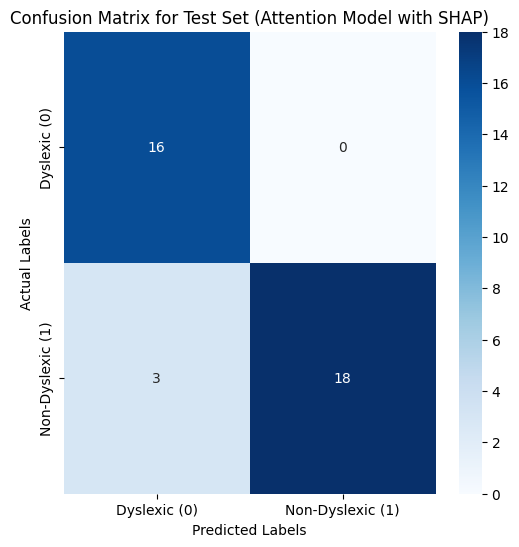

Accuracy (Test): 91.89%
Precision (Test): 100.00%
Recall (Test): 85.71%
F1 Score (Test): 92.31%


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Attention, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Assuming the dataset is loaded into 'df'
# Encode categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Extract the target variable ('Label') and features
y = df['Label'].values  # Target variable: 0 for Dyslexic, 1 for Non-Dyslexic
X = df.drop(columns=['Label'])  # Feature variables

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Build a neural network model with attention
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

# Add a Reshape layer to prepare for attention
x = Reshape((1, 32))(x)

# Attention Layer
attention_layer = Attention()([x, x])

# Flatten the attention output and add the final classification layer
x = Flatten()(attention_layer)
output_layer = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Use SHAP for model explainability
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Predict and evaluate the model
y_pred_test = (model.predict(X_test) > 0.5).astype('int32')

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix for Test Set (Attention Model with SHAP)')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy (Test): {accuracy_test * 100:.2f}%")
print(f"Precision (Test): {precision_test * 100:.2f}%")
print(f"Recall (Test): {recall_test * 100:.2f}%")
print(f"F1 Score (Test): {f1_test * 100:.2f}%")


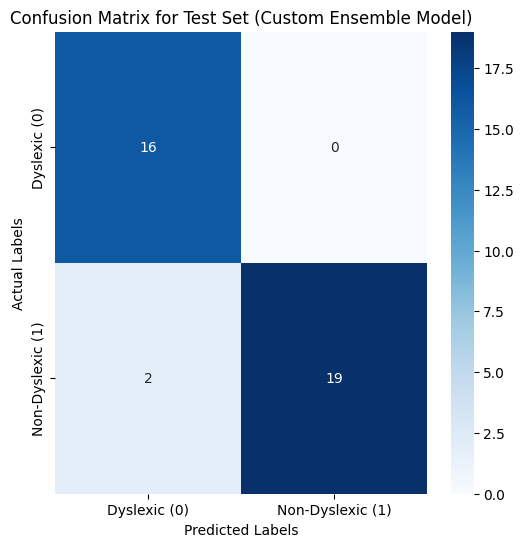

Accuracy (Test): 94.59%
Precision (Test): 100.00%
Recall (Test): 90.48%
F1 Score (Test): 95.00%
Cross-validated Accuracy: 93.51%


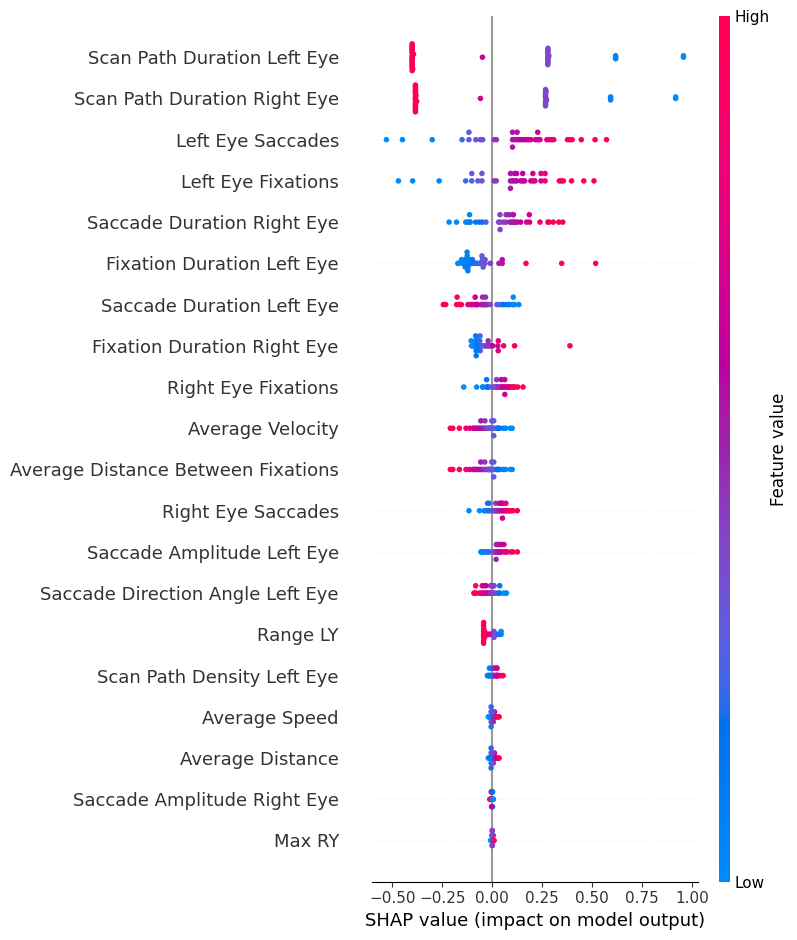

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  warnings.warn(


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.

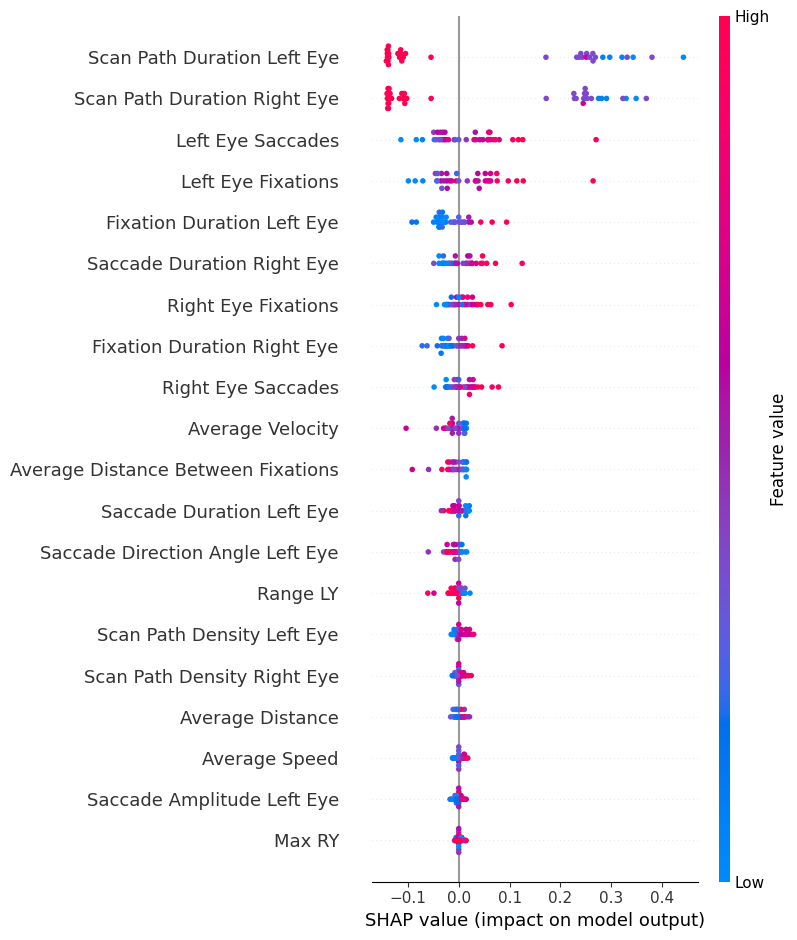

In [ ]:
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load your dataset into 'df'
# df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from a file

# Encode categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Extract the target variable ('Label') and features
y = df['Label'].values  # Target variable: 0 for Dyslexic, 1 for Non-Dyslexic
X = df.drop(columns=['Label'])  # Feature variables

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Feature selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 24 features (change if needed)
top_features = feature_importance_df.head(24)['Feature'].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

# Initialize the models
ridge = RidgeClassifier(alpha=1.0)
lda = LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')
nearest_centroid = NearestCentroid(metric='manhattan')

# Create the ensemble model with Hard Voting
ensemble_model_custom = VotingClassifier(
    estimators=[
        ('ridge', ridge),
        ('lda', lda),
        ('nearest_centroid', nearest_centroid)
    ],
    voting='hard'
)

# Train the ensemble model
ensemble_model_custom.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the test set
y_pred_test = ensemble_model_custom.predict(X_test_selected)
cm_test = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix for the test set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix for Test Set (Custom Ensemble Model)')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy (Test): {accuracy_test * 100:.2f}%")
print(f"Precision (Test): {precision_test * 100:.2f}%")
print(f"Recall (Test): {recall_test * 100:.2f}%")
print(f"F1 Score (Test): {f1_test * 100:.2f}%")

# Evaluate on the full dataset using cross-validation
scores = cross_val_score(ensemble_model_custom, X[top_features], y, cv=5)
print(f"Cross-validated Accuracy: {scores.mean() * 100:.2f}%")

### SHAP Interpretation ###
# SHAP does not directly support VotingClassifier, so we explain one of its models (RidgeClassifier)
explainer_model = ensemble_model_custom.estimators_[0]  # RidgeClassifier

# Create SHAP explainer
explainer = shap.Explainer(explainer_model, X_train_selected)

# Compute SHAP values
shap_values = explainer(X_test_selected)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_test_selected)

# Alternative SHAP explanation for full ensemble model using KernelExplainer (slower)
kernel_explainer = shap.KernelExplainer(ensemble_model_custom.predict, X_train_selected.sample(50))  # Using a sample for efficiency
shap_values_kernel = kernel_explainer.shap_values(X_test_selected)

# Summary plot for ensemble model
shap.summary_plot(shap_values_kernel, X_test_selected)


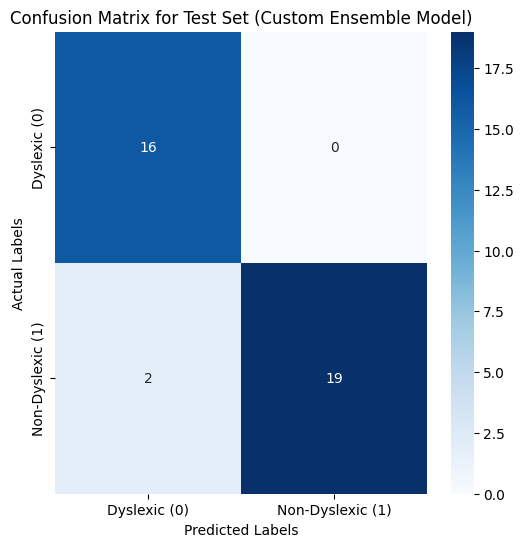

Accuracy (Test): 94.59%
Precision (Test): 100.00%
Recall (Test): 90.48%
F1 Score (Test): 95.00%
Cross-validated Accuracy: 93.51%


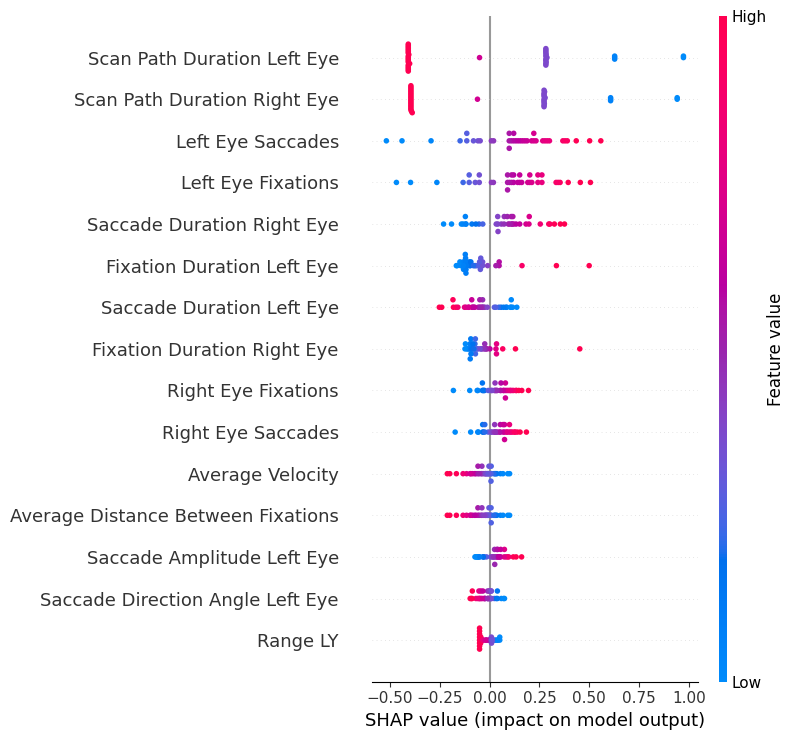

In [ ]:
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from a file

# Encode categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Extract the target variable ('Label') and features
y = df['Label'].values  # Target variable: 0 for Dyslexic, 1 for Non-Dyslexic
X = df.drop(columns=['Label'])  # Feature variables

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# **Feature Selection (Top 12 Features from SHAP Plot)**
top_12_features = [
    "Scan Path Duration Left Eye",
    "Scan Path Duration Right Eye",
    "Left Eye Saccades",
    "Left Eye Fixations",
    "Saccade Duration Right Eye",
    "Fixation Duration Left Eye",
    "Saccade Duration Left Eye",
    "Fixation Duration Right Eye",
    "Right Eye Fixations",
    "Average Velocity",
    "Average Distance Between Fixations",
    "Right Eye Saccades",
    "Saccade Amplitude Left Eye",
    "Saccade Direction Angle Left Eye","Range LY"

]

X_train_selected = X_train[top_12_features]
X_test_selected = X_test[top_12_features]

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

# Initialize models
ridge = RidgeClassifier(alpha=1.0)
lda = LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')
nearest_centroid = NearestCentroid(metric='manhattan')

# Create the ensemble model with Hard Voting
ensemble_model_custom = VotingClassifier(
    estimators=[
        ('ridge', ridge),
        ('lda', lda),
        ('nearest_centroid', nearest_centroid)
    ],
    voting='hard'
)

# Train the ensemble model
ensemble_model_custom.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the test set
y_pred_test = ensemble_model_custom.predict(X_test_selected)
cm_test = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix for the test set
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'],
            yticklabels=['Dyslexic (0)', 'Non-Dyslexic (1)'])
plt.title('Confusion Matrix for Test Set (Custom Ensemble Model)')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy (Test): {accuracy_test * 100:.2f}%")
print(f"Precision (Test): {precision_test * 100:.2f}%")
print(f"Recall (Test): {recall_test * 100:.2f}%")
print(f"F1 Score (Test): {f1_test * 100:.2f}%")

# Evaluate on the full dataset using cross-validation
scores = cross_val_score(ensemble_model_custom, X[top_12_features], y, cv=5)
print(f"Cross-validated Accuracy: {scores.mean() * 100:.2f}%")

### **SHAP Interpretation (Top 12 Features)**
# SHAP does not directly support VotingClassifier, so we explain one of its models (RidgeClassifier)
explainer_model = ensemble_model_custom.estimators_[0]  # RidgeClassifier

# Create SHAP explainer
explainer = shap.Explainer(explainer_model, X_train_selected)

# Compute SHAP values
shap_values = explainer(X_test_selected)

# Summary plot of feature importance (only top 12 features)
shap.summary_plot(shap_values, X_test_selected)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 58)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 256)            │         15,104 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 256)            │          1,024 │ dense_27[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_24 (Dropout)      │ (None, 256)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 128)            │         32,896 │ dropout_24[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_25    │ (None, 128)            │            512 │ dense_28[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_25 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 128)            │         16,512 │ dropout_25[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_26    │ (None, 128)            │            512 │ dense_29[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_26 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 128)            │         16,512 │ dropout_26[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_27    │ (None, 128)            │            512 │ dense_30[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_27 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 128)            │         16,512 │ dropout_27[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_28    │ (None, 128)            │            512 │ dense_31[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_28 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)     

 Total params: 187,073 (730.75 KB)

 Trainable params: 184,129 (719.25 KB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5275 - loss: 0.8046 - val_accuracy: 0.5676 - val_loss: 3.6553
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5210 - loss: 0.7565 - val_accuracy: 0.5676 - val_loss: 2.1831
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5432 - loss: 0.7947 - val_accuracy: 0.5676 - val_loss: 1.5972
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4883 - loss: 0.8354 - val_accuracy: 0.5676 - val_loss: 1.5176
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4536 - loss: 0.8062 - val_accuracy: 0.5135 - val_loss: 1.2998
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5519 - loss: 0.7429 - val_accuracy: 0.5135 - val_loss: 1.2486
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4927 - loss: 0.8045 - val_accuracy: 0.4324 - val_loss: 1.1000
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4932 - loss: 0.7838 - val_accuracy: 0.4324 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_103
Received: inputs=['Tensor(shape=(37, 58))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_103
Received: inputs=['Tensor(shape=(50, 58))']
  warnings.warn(msg)


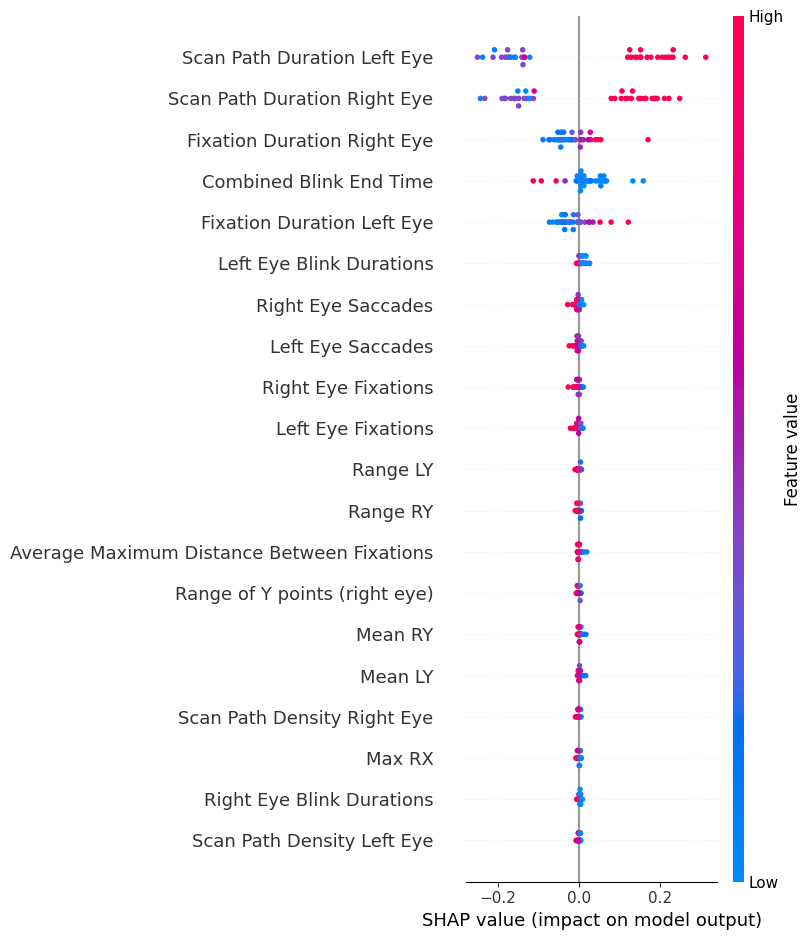

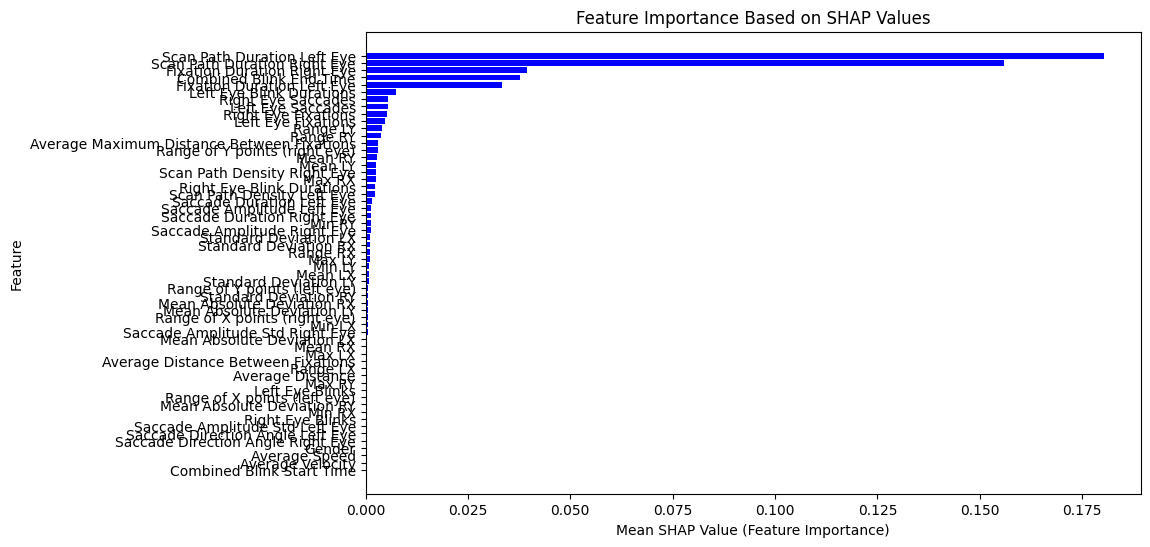

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5939 - loss: 0.7979 - val_accuracy: 0.4324 - val_loss: 22.6135
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6630 - loss: 0.7029 - val_accuracy: 0.4324 - val_loss: 13.3866
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7388 - loss: 0.5848 - val_accuracy: 0.4324 - val_loss: 12.0805
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8541 - loss: 0.4625 - val_accuracy: 0.4324 - val_loss: 11.1030
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8144 - loss: 0.4089 - val_accuracy: 0.4324 - val_loss: 10.6222
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8771 - loss: 0.3766 - val_accuracy: 0.4324 - val_loss: 10.5702
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8770 - loss: 0.3765 - val_accuracy: 0.4324 - val_loss: 10.1059
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9007 - loss: 0.3538 - val_accuracy: 0.4324 - val

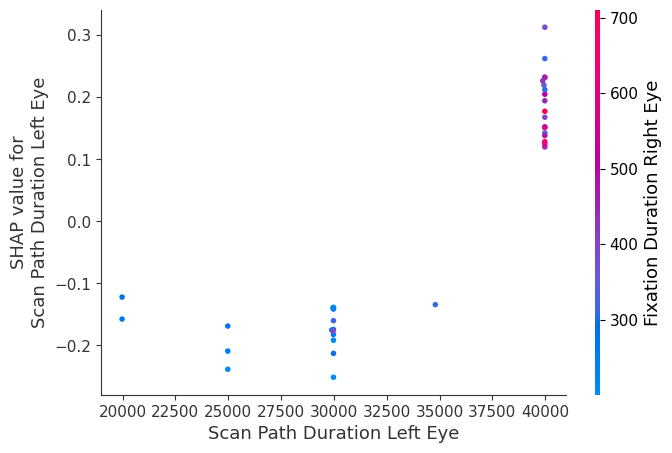

In [ ]:
# Import necessary libraries
import tensorflow as tf
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, Layer, Multiply, BatchNormalization, Concatenate
from tensorflow.keras.models import Model

# Custom Attention Layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.attention_weights = self.add_weight(
            shape=(input_shape[-1], 1),
            initializer="random_normal",
            trainable=True,
            name="attention_weights"
        )
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        scores = tf.matmul(inputs, self.attention_weights)
        scores = tf.nn.softmax(scores, axis=1)  # Normalize scores
        weighted_inputs = Multiply()([inputs, scores])
        return tf.reduce_sum(weighted_inputs, axis=1)

# ExpandDims Layer
class ExpandDimsLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)

# Data Preprocessing Function
def preprocess_data(X):
    if isinstance(X, pd.DataFrame):
        X = X.copy()
        X = X.select_dtypes(include=[np.number])
        X = X.fillna(0)
        X = np.array(X, dtype=np.float32)

    if len(X.shape) == 1 or X.shape[1] == 0:
        X = X.reshape(-1, 1)

    return X

# Model creation function with configurable hidden and attention layers
def create_model(input_dim, num_attention_layers=2, num_hidden_layers=5):
    inputs = Input(shape=(input_dim,))

    # First hidden layer
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Dynamically add hidden layers
    for _ in range(num_hidden_layers - 1):  # -1 because we already added one
        x = Dense(128, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)

    # Attention Layers
    attention_outputs = []
    for _ in range(num_attention_layers):
        attention_out = AttentionLayer()(x)
        attention_out = ExpandDimsLayer(axis=-1)(attention_out)
        attention_outputs.append(attention_out)

    # Concatenate attention outputs
    concatenated_attention = Concatenate()(attention_outputs)

    # Fully connected layers after attention
    x = Dense(64, activation='relu')(concatenated_attention)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Define model
    model = Model(inputs, outputs)
    return model

# Load and preprocess data
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

y_train_encoded, _ = pd.factorize(y_train)
y_train_encoded = y_train_encoded.astype(np.float32)
y_test_encoded, _ = pd.factorize(y_test)
y_test_encoded = y_test_encoded.astype(np.float32)

# Initialize model
input_dim = X_train.shape[1]
num_attention_layers = 5  # Adjust attention depth
num_hidden_layers = 10 # Adjust hidden layers

model = create_model(input_dim, num_attention_layers=num_attention_layers, num_hidden_layers=num_hidden_layers)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=500,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# SHAP Analysis
background_data = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]  # Random subset for efficiency
explainer = shap.GradientExplainer(model, background_data)
shap_values = explainer.shap_values(X_test)

# Convert SHAP Values to Numpy Array
shap_values_array = np.array(shap_values).squeeze()

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_array, X_test, feature_names=X.columns)

# Feature Importance Plot
shap_importance = np.abs(shap_values_array).mean(axis=0)
sorted_indices = np.argsort(shap_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_indices], shap_importance[sorted_indices], color='blue')
plt.xlabel('Mean SHAP Value (Feature Importance)')
plt.ylabel('Feature')
plt.title('Feature Importance Based on SHAP Values')
plt.gca().invert_yaxis()
plt.show()

# Feature Selection (Top 5 Features)
top_features = X.columns[sorted_indices[:5]]
X_train_selected = X_train[:, sorted_indices[:5]]
X_test_selected = X_test[:, sorted_indices[:5]]

# Retrain Model with Selected Features
selected_model = create_model(len(top_features), num_attention_layers=3, num_hidden_layers=5)
selected_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_selected = selected_model.fit(
    X_train_selected, y_train_encoded,
    validation_data=(X_test_selected, y_test_encoded),
    epochs=500,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]
)

# Evaluate Selected Feature Model
val_loss_selected, val_accuracy_selected = selected_model.evaluate(X_test_selected, y_test_encoded, verbose=0)
print(f"Validation Accuracy (Selected Features): {val_accuracy_selected:.4f}")

# SHAP Dependence Plot for Top Feature
top_feature_name = X.columns[sorted_indices[0]]
shap.dependence_plot(top_feature_name, shap_values_array, X_test, feature_names=X.columns)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 19)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │          5,120 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256)            │          1,024 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         32,896 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128)            │            512 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         16,512 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │         16,512 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128)            │            512 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │         16,512 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 128)            │            512 │ dense_4[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer           │ (None)                 │            128 │ dropout_4[0][0]        │
│ (AttentionLayer)     

 Total params: 91,585 (357.75 KB)

 Trainable params: 89,921 (351.25 KB)

 Non-trainable params: 1,664 (6.50 KB)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4757 - loss: 0.8648 - val_accuracy: 0.2973 - val_loss: 0.7109
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4557 - loss: 0.8493 - val_accuracy: 0.4324 - val_loss: 0.6974
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5400 - loss: 0.7194 - val_accuracy: 0.4324 - val_loss: 0.7021
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6059 - loss: 0.6222 - val_accuracy: 0.4324 - val_loss: 0.6940
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7040 - loss: 0.5884 - val_accuracy: 0.5946 - val_loss: 0.6700
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8403 - loss: 0.4448 - val_accuracy: 0.5946 - val_loss: 0.6505
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7894 - loss: 0.4681 - val_accuracy: 0.5676 - val_loss: 0.6549
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8014 - loss: 0.4552 - val_accuracy: 0.5676 - val_loss: 

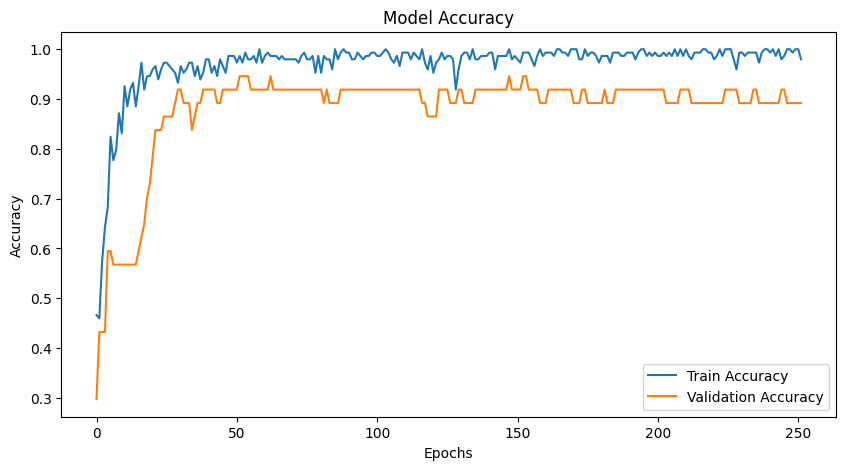

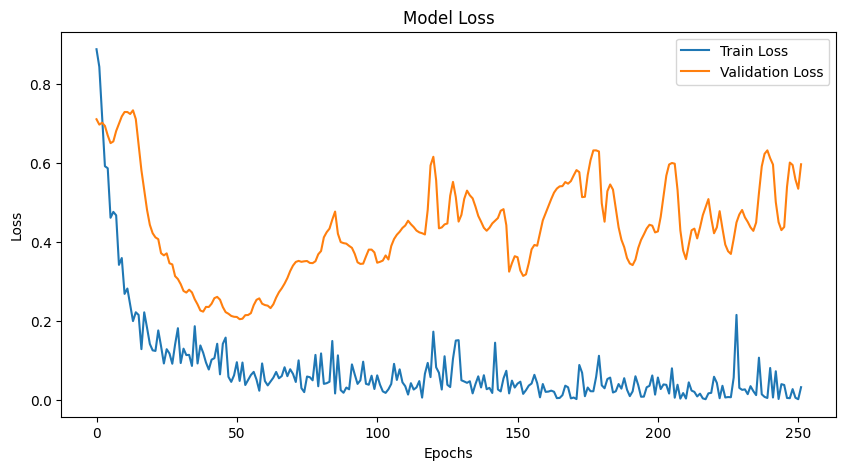

In [ ]:
# Import necessary libraries
import tensorflow as tf
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, Layer, Multiply, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume last column is the target variable (adjust if needed)
# X = df.iloc[:, 0]  # This line was incorrect, selecting only the first column
X = df.iloc[:, 2:] # Select all columns starting from the third column as features
Y = df.iloc[:, 0]  # Use the first column as the target variable

# **Manually Define Top 19 Features (From SHAP Plot)**
top_19_features = [
    "Scan Path Duration Left Eye",
    "Scan Path Duration Right Eye",
    "Fixation Duration Right Eye",
    "Combined Blink End Time",
    "Fixation Duration Left Eye",
    "Left Eye Blink Durations",
    "Right Eye Saccades",
    "Left Eye Saccades",
    "Right Eye Fixations",
    "Left Eye Fixations",
    "Range LY",
    "Range RY",
    "Average Maximum Distance Between Fixations",
    "Range of Y points (right eye)",
    "Mean RY",
    "Mean LY",
    "Scan Path Density Right Eye",
    "Max RX",
    "Right Eye Blink Durations"
]

# Keep only the selected features
X = X[top_19_features]  # Now X is a DataFrame, so this will work correctly

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert back to DataFrame to maintain feature names
X_train = pd.DataFrame(X_train, columns=top_19_features)
X_test = pd.DataFrame(X_test, columns=top_19_features)
# ------------------- Step 2: Custom Attention Layer -------------------

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.attention_weights = self.add_weight(
            shape=(input_shape[-1], 1),
            initializer="random_normal",
            trainable=True,
            name="attention_weights"
        )
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        scores = tf.matmul(inputs, self.attention_weights)
        scores = tf.nn.softmax(scores, axis=1)  # Normalize scores
        weighted_inputs = Multiply()([inputs, scores])
        return tf.reduce_sum(weighted_inputs, axis=1)

class ExpandDimsLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)

# ------------------- Step 3: Convert Data -------------------

def preprocess_data(X):
    """Ensure X is a DataFrame before converting to NumPy array."""
    if isinstance(X, np.ndarray):
        raise ValueError("X must be a Pandas DataFrame before selection.")

    X_selected = X.copy()  # Already filtered to top 19 features
    X_selected = X_selected.fillna(0)  # Fill missing values

    return np.array(X_selected, dtype=np.float32)

# Apply preprocessing
X_train_selected = preprocess_data(X_train)
X_test_selected = preprocess_data(X_test)

# Convert target variable to numerical encoding
y_train_encoded, _ = pd.factorize(y_train)
y_train_encoded = y_train_encoded.astype(np.float32)
y_test_encoded, _ = pd.factorize(y_test)
y_test_encoded = y_test_encoded.astype(np.float32)

# ------------------- Step 4: Create Attention-Based Model -------------------

def create_model(input_dim, num_attention_layers=3, num_hidden_layers=5):
    inputs = Input(shape=(input_dim,))

    # First hidden layer
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Dynamically add hidden layers
    for _ in range(num_hidden_layers - 1):  # -1 because first layer is already added
        x = Dense(128, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)

    # Attention Layers
    attention_outputs = []
    for _ in range(num_attention_layers):
        attention_out = AttentionLayer()(x)
        attention_out = ExpandDimsLayer(axis=-1)(attention_out)
        attention_outputs.append(attention_out)

    # Concatenate attention outputs
    concatenated_attention = Concatenate()(attention_outputs)

    # Fully connected layers after attention
    x = Dense(64, activation='relu')(concatenated_attention)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Define model
    model = Model(inputs, outputs)
    return model

# ------------------- Step 5: Train the Model -------------------

input_dim = X_train_selected.shape[1]  # Should be 19 features
model = create_model(input_dim, num_attention_layers=3, num_hidden_layers=5)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    X_train_selected, y_train_encoded,
    validation_data=(X_test_selected, y_test_encoded),
    epochs=500,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]
)

# ------------------- Step 6: Evaluate and Visualize -------------------

val_loss, val_accuracy = model.evaluate(X_test_selected, y_test_encoded, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Enter number of attention layers: 5
Enter number of hidden layers: 20


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 9)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_122 (Dense)         │ (None, 256)            │          2,560 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_116   │ (None, 256)            │          1,024 │ dense_122[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_116 (Dropout)     │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_123 (Dense)         │ (None, 128)            │         32,896 │ dropout_116[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_117   │ (None, 128)            │            512 │ dense_123[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_117 (Dropout)     │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_124 (Dense)         │ (None, 128)            │         16,512 │ dropout_117[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_118   │ (None, 128)            │            512 │ dense_124[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_118 (Dropout)     │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_125 (Dense)         │ (None, 128)            │         16,512 │ dropout_118[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_119   │ (None, 128)            │            512 │ dense_125[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_119 (Dropout)     │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_126 (Dense)         │ (None, 128)            │         16,512 │ dropout_119[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_120   │ (None, 128)            │            512 │ dense_126[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_120 (Dropout)     │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_127 (Dense)    

 Total params: 344,769 (1.32 MB)

 Trainable params: 339,265 (1.29 MB)

 Non-trainable params: 5,504 (21.50 KB)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.4773 - loss: 1.0484 - val_accuracy: 0.4324 - val_loss: 0.7249
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4422 - loss: 0.9170 - val_accuracy: 0.4324 - val_loss: 0.7575
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5374 - loss: 0.8256 - val_accuracy: 0.4324 - val_loss: 0.7728
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4770 - loss: 0.8311 - val_accuracy: 0.4324 - val_loss: 0.7842
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5075 - loss: 0.8187 - val_accuracy: 0.4324 - val_loss: 0.7876
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5539 - loss: 0.7916 - val_accuracy: 0.4324 - val_loss: 0.7721
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4966 - loss: 0.8838 - val_accuracy: 0.4324 - val_loss: 0.7520
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5492 - loss: 0.7605 - val_accuracy: 0.4324 - val_loss: 

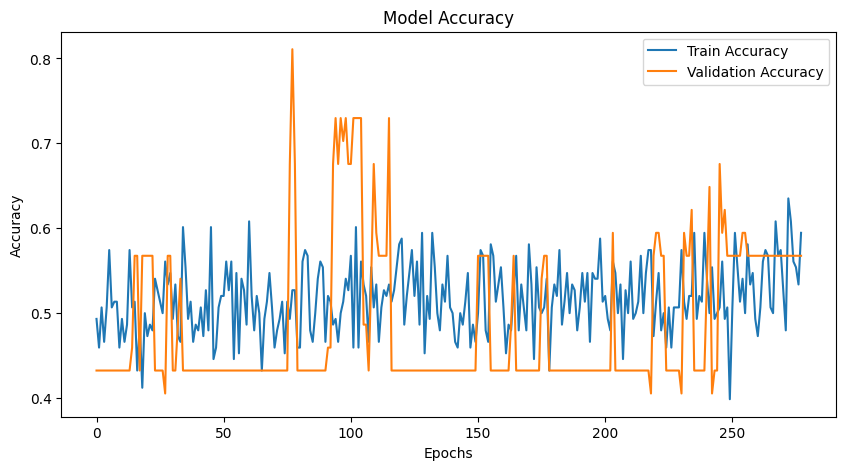

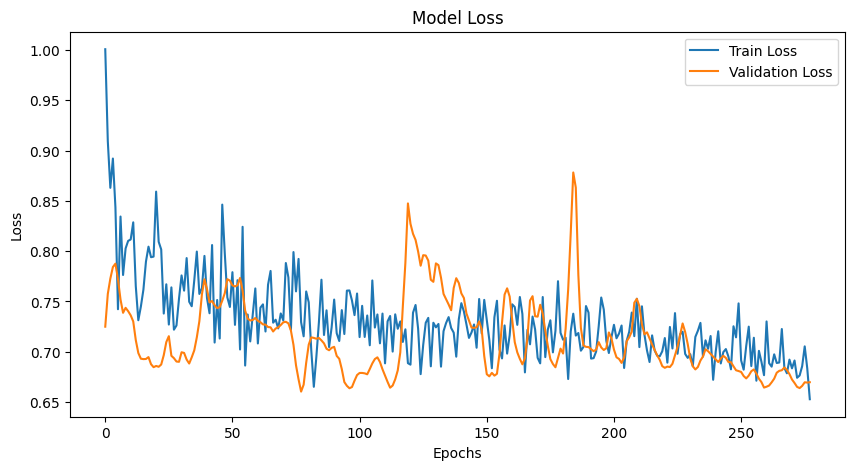

In [ ]:
import tensorflow as tf
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, Layer, Multiply, BatchNormalization, Concatenate
from tensorflow.keras.models import Model

# ------------------- Step 1: Define Custom Attention Layer -------------------

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.attention_weights = self.add_weight(
            shape=(input_shape[-1], 1),
            initializer="random_normal",
            trainable=True,
            name="attention_weights"
        )
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        scores = tf.matmul(inputs, self.attention_weights)
        scores = tf.nn.softmax(scores, axis=1)  # Normalize scores
        weighted_inputs = Multiply()([inputs, scores])
        return tf.reduce_sum(weighted_inputs, axis=1)

# ------------------- Step 2: Define ExpandDims Layer -------------------

class ExpandDimsLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)

# ------------------- Step 3: Define Data Preprocessing Function -------------------

def preprocess_data(X):
    if isinstance(X, pd.DataFrame):
        X = X.copy()
        X = X.select_dtypes(include=[np.number])  # Keep only numerical data
        X = X.fillna(0)  # Fill NaN values
        X = np.array(X, dtype=np.float32)

    if len(X.shape) == 1 or X.shape[1] == 0:
        X = X.reshape(-1, 1)  # Ensure valid shape

    return X

# ------------------- Step 4: Define Model Creation Function -------------------

def create_model(input_dim, num_attention_layers=2, num_hidden_layers=5):
    inputs = Input(shape=(input_dim,))

    # First hidden layer
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Dynamically add hidden layers
    for _ in range(num_hidden_layers - 1):  # -1 because we already added one
        x = Dense(128, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)

    # Attention Layers
    attention_outputs = []
    for _ in range(num_attention_layers):
        attention_out = AttentionLayer()(x)
        attention_out = ExpandDimsLayer(axis=-1)(attention_out)
        attention_outputs.append(attention_out)

    # Concatenate attention outputs
    concatenated_attention = Concatenate()(attention_outputs)

    # Fully connected layers after attention
    x = Dense(64, activation='relu')(concatenated_attention)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Define model
    model = Model(inputs, outputs)
    return model


# Assume last column is the target variable (adjust if needed)
X = df.iloc[:, 2:] # Select all columns starting from the third column as features
Y = df.iloc[:, 0]

# Define top 19 features manually (from SHAP analysis)
top_19_features = [
    "Scan Path Duration Left Eye",
    "Scan Path Duration Right Eye",
    "Fixation Duration Right Eye",
    "Combined Blink End Time",
    "Fixation Duration Left Eye",
    "Left Eye Blink Durations",
    "Right Eye Saccades",
    "Left Eye Saccades",
    "Right Eye Fixations",

]

# Keep only selected features
X = X[top_19_features]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target variable to numerical encoding
y_train_encoded, _ = pd.factorize(y_train)
y_train_encoded = y_train_encoded.astype(np.float32)
y_test_encoded, _ = pd.factorize(y_test)
y_test_encoded = y_test_encoded.astype(np.float32)

# ------------------- Step 6: Get User Input for Attention and Hidden Layers -------------------

num_attention_layers = int(input("Enter number of attention layers: "))  # User-defined
num_hidden_layers = int(input("Enter number of hidden layers: "))  # User-defined

# ------------------- Step 7: Initialize and Train the Model -------------------

input_dim = X_train.shape[1]
model = create_model(input_dim, num_attention_layers=num_attention_layers, num_hidden_layers=num_hidden_layers)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=500,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]
)

# ------------------- Step 8: Evaluate and Visualize -------------------

val_loss, val_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
